In [1]:
import psycopg2
import config as creds
import sqlalchemy
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

### Connecting to the Database

In [2]:
user=creds.PGUSER
password=creds.PGPASSWORD
host=creds.PGHOST
port=5432
database=creds.PGDATABASE

In [3]:
engine_str=f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"

In [4]:
engine = create_engine(engine_str)

In [5]:
conn = engine.raw_connection()
print('Connected')

Connected


In [6]:
cur = conn.cursor()
print('Cursor created')

Cursor created


### Query

In [7]:
query2='''
SELECT b.kbtu, b.reportedbuildinggrossfloorarea, b.ward, b.primarypropertytype_selfselect, b.elegas, b.reportingyear, n.awnd,
       n.cldd, n.htdd, n.tavg, n.wdf2, n.wdf5, n.wsf2,n.wsf5, n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.KBTU > 0
AND b.reportingyear = 2018; 
'''

In [8]:
query3='''
SELECT b.kbtu, b.reportedbuildinggrossfloorarea, b.ward, b.primarypropertytype_selfselect, b.elegas, b.reportingyear, n.awnd,
       n.cldd, n.htdd, n.tavg, n.wdf2, n.wdf5, n.wsf2,n.wsf5, n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.KBTU > 0
AND b.reportingyear = 2019; 
'''

In [9]:
df=pd.read_sql(query2, conn)

In [10]:
df['kbtusqft']=df['kbtu']/df['reportedbuildinggrossfloorarea']
df['datetime']=pd.to_datetime(df['date'])
df['primarypropertytype_selfselect']=df['primarypropertytype_selfselect'].astype('object')
df.set_index('datetime', inplace=True)

In [11]:
query4='''
SELECT b.kbtu,b.reportedbuildinggrossfloorarea, b.ward, b.primarypropertytype_selfselect, b.elegas,b.reportingyear, n.awnd,
       n.cldd, n.htdd, n.tavg, n.wdf2, n.wdf5, n.wsf2,n.wsf5, n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.KBTU > 0
AND b.elegas = 'N'
AND b.reportingyear = 2018; 
'''

In [12]:
query5='''
SELECT b.kbtu,b.reportedbuildinggrossfloorarea, b.ward, b.primarypropertytype_selfselect, b.elegas,b.reportingyear, n.awnd,
       n.cldd, n.htdd, n.tavg, n.wdf2, n.wdf5, n.wsf2,n.wsf5, n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.KBTU > 0
AND b.elegas = 'N'
AND b.reportingyear = 2019; 
'''

In [13]:
query6='''
SELECT b.kbtu,b.reportedbuildinggrossfloorarea, b.ward, b.primarypropertytype_selfselect, b.elegas,b.reportingyear, n.awnd,
       n.cldd, n.htdd, n.tavg, n.wdf2, n.wdf5, n.wsf2,n.wsf5, n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.KBTU > 0
AND b.elegas = 'E'
AND b.reportingyear = 2018; 
'''

In [14]:
query7='''
SELECT b.kbtu,b.reportedbuildinggrossfloorarea, b.ward, b.primarypropertytype_selfselect, b.elegas, b.reportingyear, n.awnd,
       n.cldd, n.htdd, n.tavg, n.wdf2, n.wdf5, n.wsf2,n.wsf5, n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.KBTU > 0
AND b.elegas = 'E'
AND b.reportingyear = 2019; 
'''

In [15]:
natdf2018=pd.read_sql(query4, conn)
natdf2019=pd.read_sql(query5, conn)
eledf2018=pd.read_sql(query6, conn)
eledf2019=pd.read_sql(query7, conn)

In [16]:
natdf2018['kbtusqft']=natdf2018['kbtu']/natdf2018['reportedbuildinggrossfloorarea']
# natdf['kbtusqft']=natdf['kbtu']/natdf['taxrecordfloorarea']
natdf2018['datetime']=pd.to_datetime(natdf2018['date'])
natdf2018['primarypropertytype_selfselect']=natdf2018['primarypropertytype_selfselect'].astype('object')
natdf2018.set_index('datetime', inplace=True)

natdf2019['kbtusqft']=natdf2019['kbtu']/natdf2019['reportedbuildinggrossfloorarea']
# natdf['kbtusqft']=natdf['kbtu']/natdf['taxrecordfloorarea']
natdf2019['datetime']=pd.to_datetime(natdf2019['date'])
natdf2019['primarypropertytype_selfselect']=natdf2019['primarypropertytype_selfselect'].astype('object')
natdf2019.set_index('datetime', inplace=True)


In [17]:
eledf2018['kbtusqft']=eledf2018['kbtu']/eledf2018['reportedbuildinggrossfloorarea']
eledf2018['datetime']=pd.to_datetime(eledf2018['date'])
eledf2018['primarypropertytype_selfselect']=eledf2018['primarypropertytype_selfselect'].astype('object')
eledf2018.set_index('datetime', inplace=True)

eledf2019['kbtusqft']=eledf2019['kbtu']/eledf2019['reportedbuildinggrossfloorarea']
eledf2019['datetime']=pd.to_datetime(eledf2019['date'])
eledf2019['primarypropertytype_selfselect']=eledf2019['primarypropertytype_selfselect'].astype('object')
eledf2019.set_index('datetime', inplace=True)

In [18]:
natdf2_2018 =natdf2018.loc[natdf2018['primarypropertytype_selfselect'] == '2', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf3_2018 =natdf2018.loc[natdf2018['primarypropertytype_selfselect'] == '3', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf4_2018 =natdf2018.loc[natdf2018['primarypropertytype_selfselect'] == '4', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf5_2018 =natdf2018.loc[natdf2018['primarypropertytype_selfselect'] == '5', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf6_2018 =natdf2018.loc[natdf2018['primarypropertytype_selfselect'] == '6', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf7_2018 =natdf2018.loc[natdf2018['primarypropertytype_selfselect'] == '7', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]

natdf2_2019 =natdf2019.loc[natdf2019['primarypropertytype_selfselect'] == '2', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf3_2019 =natdf2019.loc[natdf2019['primarypropertytype_selfselect'] == '3', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf4_2019 =natdf2019.loc[natdf2019['primarypropertytype_selfselect'] == '4', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf5_2019 =natdf2019.loc[natdf2019['primarypropertytype_selfselect'] == '5', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf6_2019 =natdf2019.loc[natdf2019['primarypropertytype_selfselect'] == '6', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf7_2019 =natdf2019.loc[natdf2019['primarypropertytype_selfselect'] == '7', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]

In [19]:
eledf2_2018 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '2', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf3_2018 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '3', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf4_2018 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '4', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf5_2018 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '5', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf6_2018 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '6', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf7_2018 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '7', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]

eledf2_2019 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '2', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf3_2019 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '3', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf4_2019 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '4', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf5_2019 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '5', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf6_2019 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '6', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf7_2019 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '7', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]

In [20]:
conn.close()
print('Closed')

Closed


In [21]:
eledfsubsets_2018=[eledf2_2018,eledf3_2018,eledf4_2018,eledf5_2018,eledf6_2018,eledf7_2018]
natdfsubsets_2018=[natdf2_2018,natdf3_2018,natdf4_2018,natdf5_2018,natdf6_2018,natdf7_2018]
eledfsubsets_2019=[eledf2_2019,eledf3_2019,eledf4_2019,eledf5_2019,eledf6_2019,eledf7_2019]
natdfsubsets_2019=[natdf2_2019,natdf3_2019,natdf4_2019,natdf5_2019,natdf6_2019,natdf7_2019]


In [22]:
for eledfsubset_2018 in eledfsubsets_2018:
    print(eledfsubset_2018.kbtu.count())

2138
552
168
12
336
9220


In [23]:
for eledfsubset_2019 in eledfsubsets_2019:
    print(eledfsubset_2019.kbtu.count())

2138
552
168
12
336
9220


In [24]:
for natdfsubset_2018 in natdfsubsets_2018:
    print(natdfsubset_2018.kbtu.count())

1924
420
168
12
242
8045


In [25]:
for natdfsubset_2019 in natdfsubsets_2019:
    print(natdfsubset_2019.kbtu.count())

1947
589
163
20
204
8618


Discovered that building type 5 does not have enough samples and will need to be removed from modeling.

In [26]:
eledfsubsets_2018=[eledf2_2018,eledf3_2018,eledf4_2018,eledf6_2018,eledf7_2018]
natdfsubsets_2018=[natdf2_2018,natdf3_2018,natdf4_2018,natdf6_2018,natdf7_2018]
eledfsubsets_2019=[eledf2_2019,eledf3_2019,eledf4_2019,eledf6_2019,eledf7_2019]
natdfsubsets_2019=[natdf2_2019,natdf3_2019,natdf4_2019,natdf6_2019,natdf7_2019]

In [27]:
from sklearn.model_selection import train_test_split as tts

TARGET = 'kbtu'
COLS =['reportedbuildinggrossfloorarea','ward','awnd','cldd', 'htdd', 'tavg','wdf2', 'wdf5', 'wsf2','wsf5', 'datetime']

def make_sklearn_data(df, target=TARGET, cols=COLS):
    # Add the datetime column back to the main dataframe
    df = df.reset_index()
    X, y = df[cols], df[target]
    return X, y

In [28]:
ft = ['reportedbuildinggrossfloorarea','ward','awnd','cldd', 'htdd', 'tavg','wdf2', 'wdf5', 'wsf2','wsf5']

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


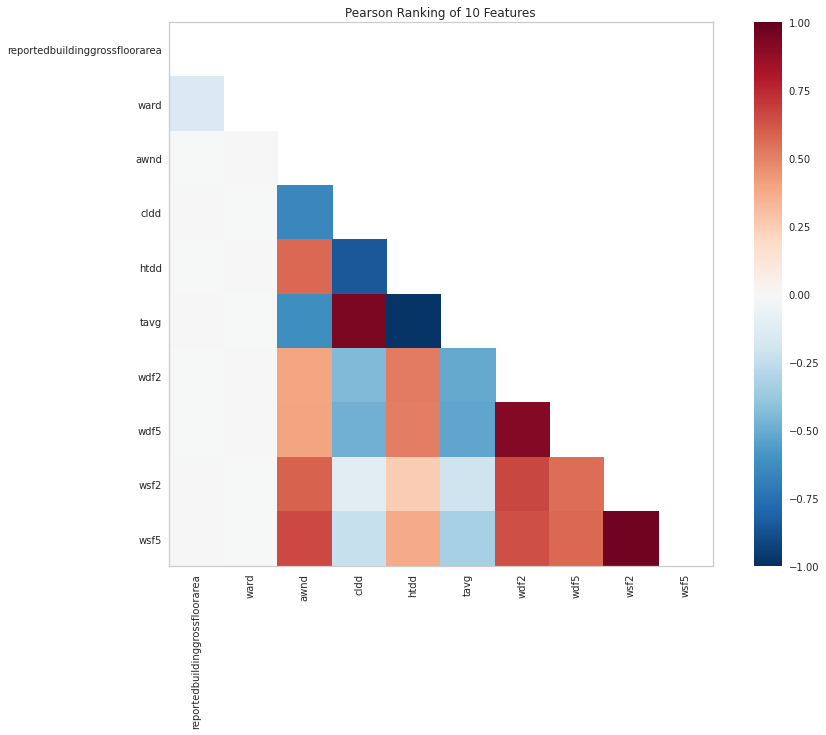

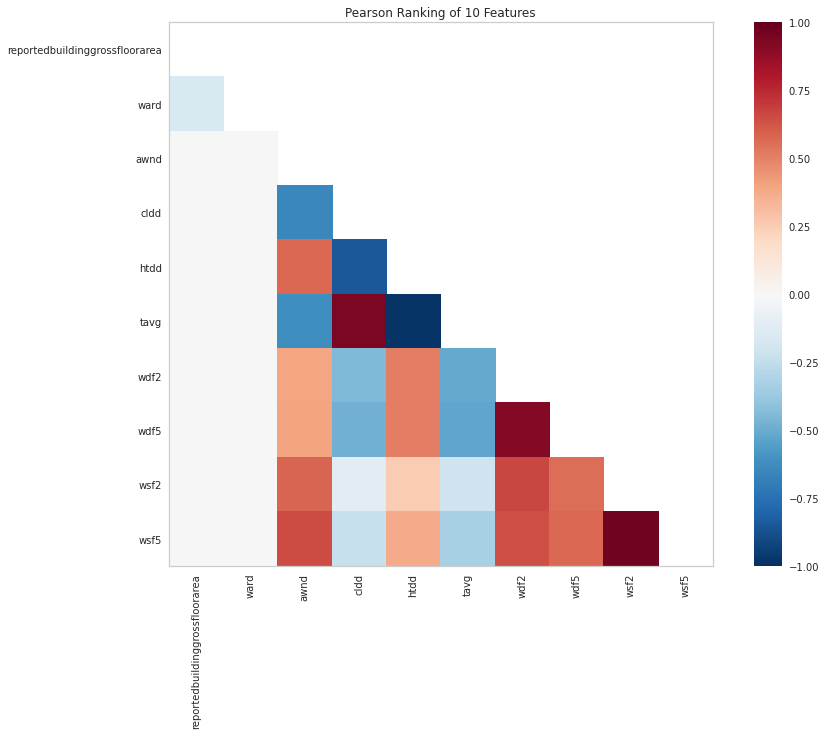

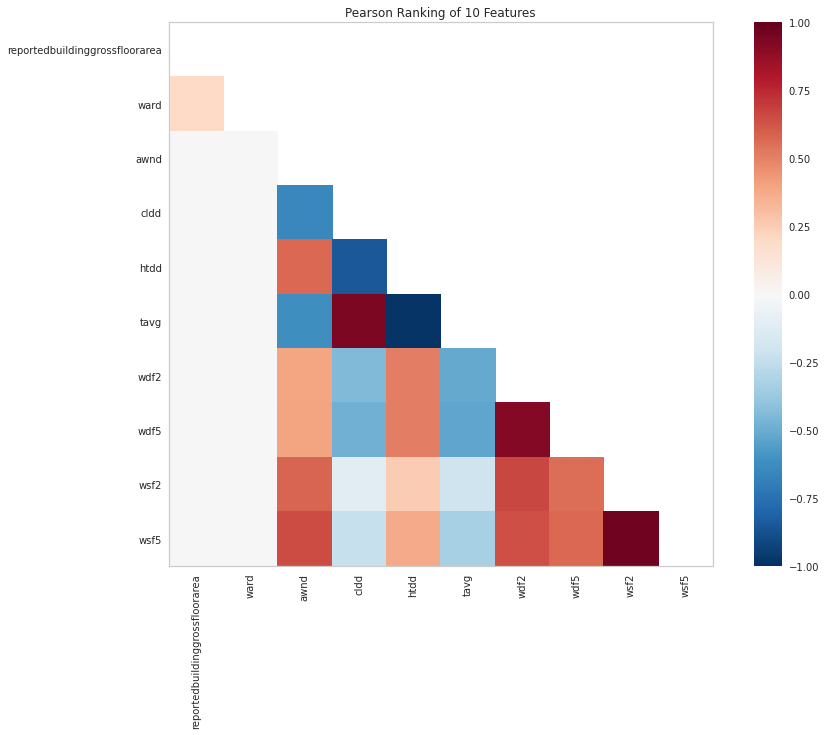

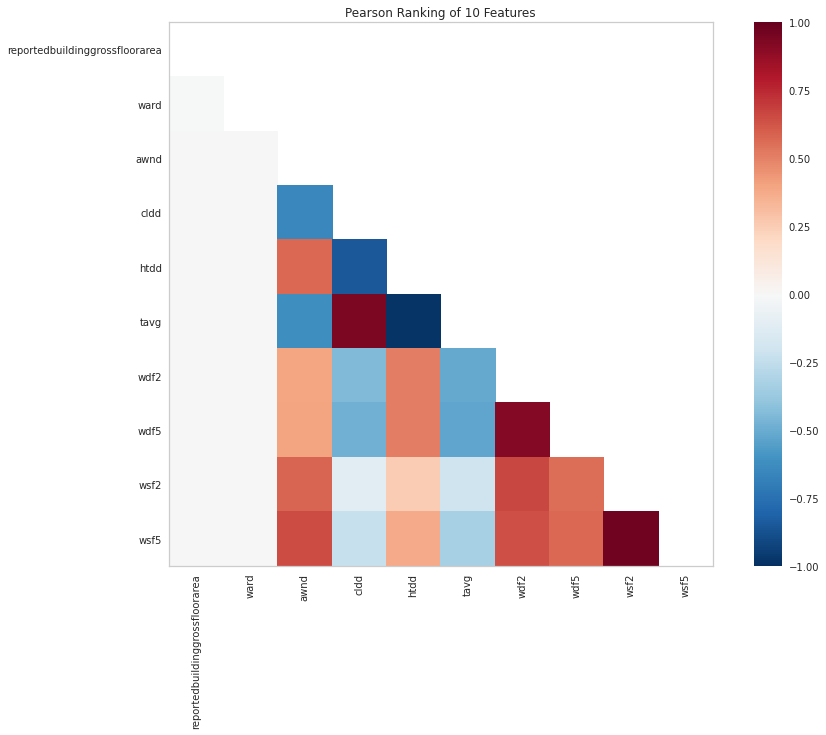

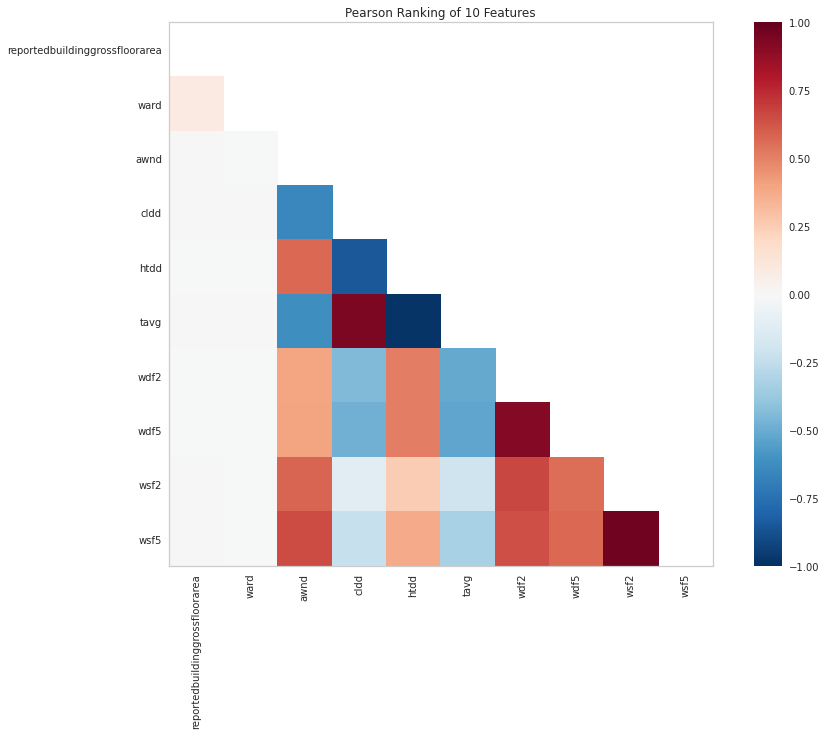

In [29]:
#Rank2D
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
for eledfsubset_2018 in eledfsubsets_2018:
    visualizer = Rank2D(algorithm='pearson', features=ft, size=(1080, 720))
    X,y = make_sklearn_data(eledfsubset_2018, cols=ft)
    visualizer.fit(X, y)
    visualizer.transform(X)
    visualizer.show()

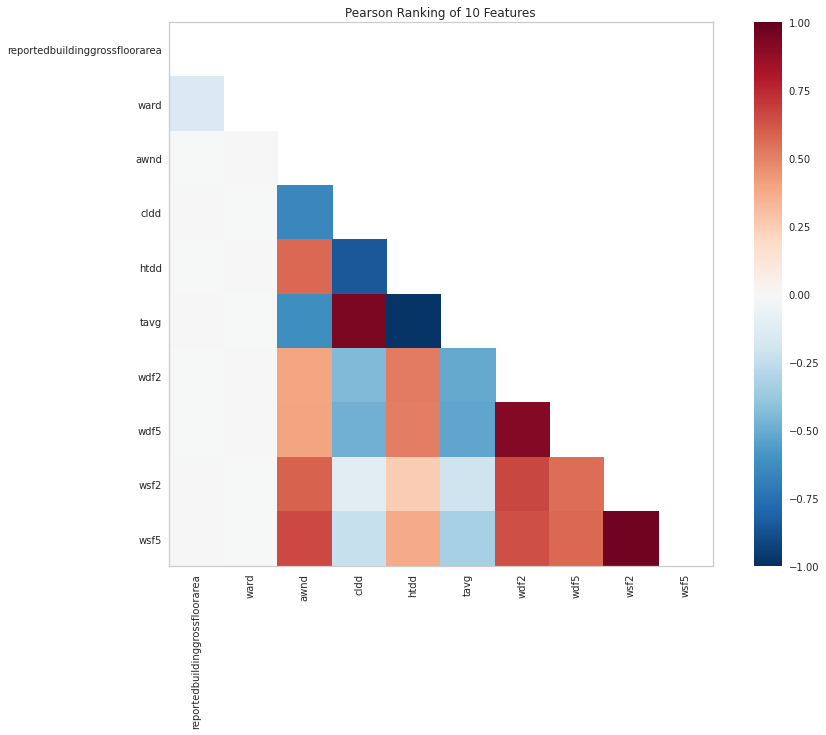

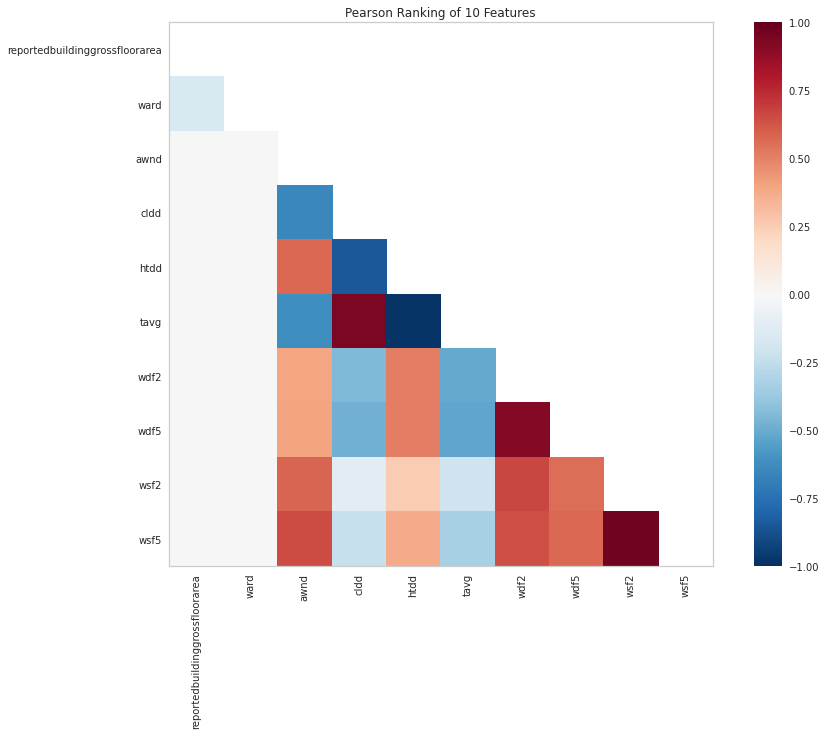

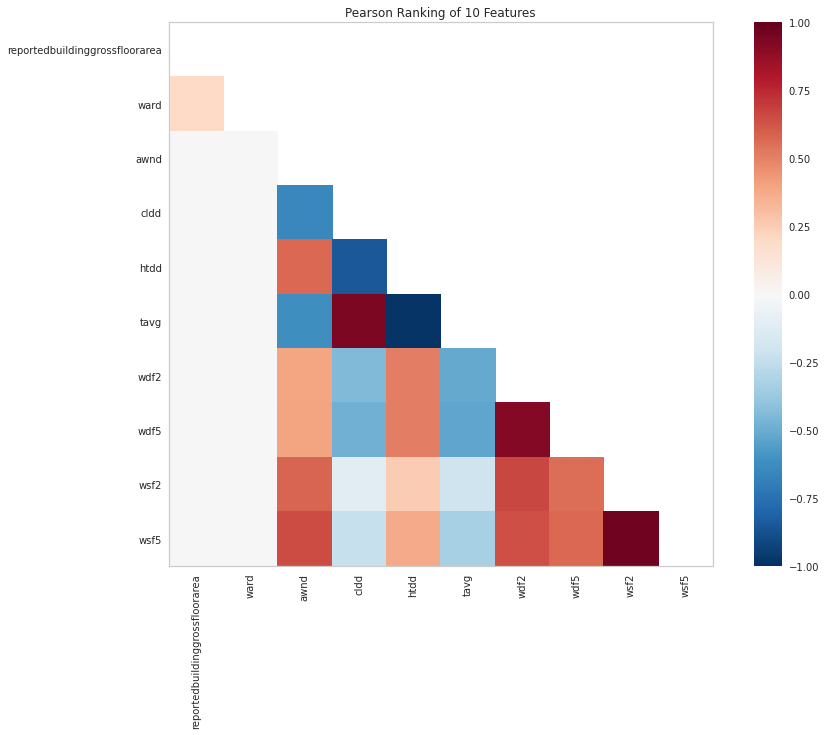

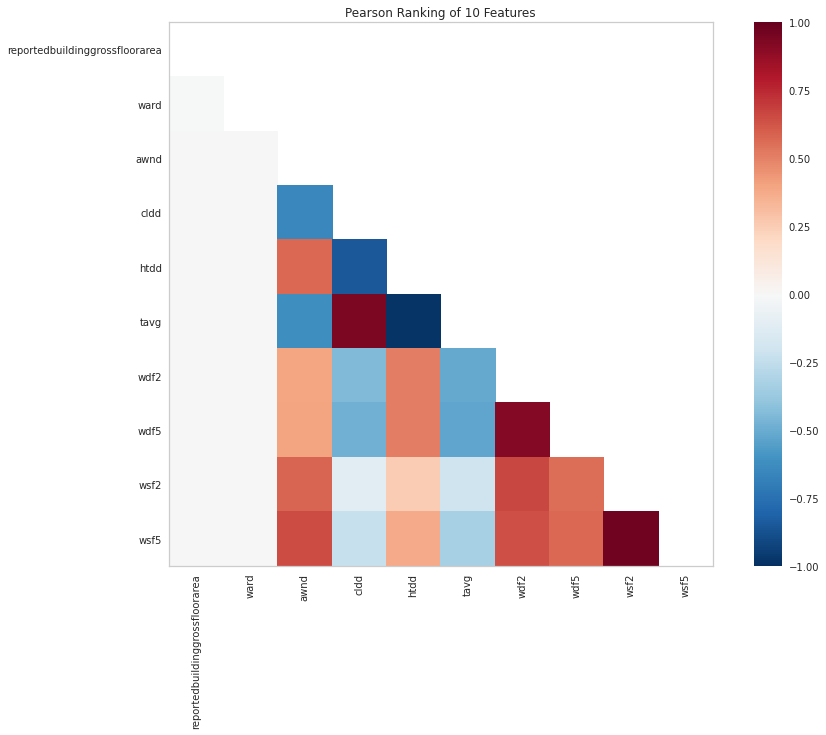

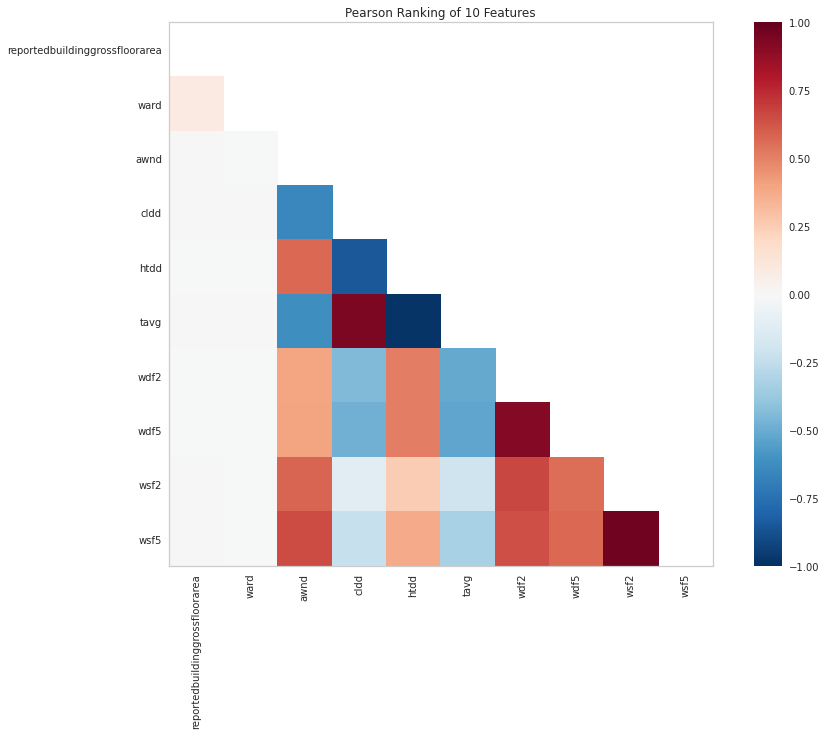

In [30]:
#Rank2D
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
for eledfsubset_2019 in eledfsubsets_2019:
    visualizer = Rank2D(algorithm='pearson', features=ft, size=(1080, 720))
    X,y = make_sklearn_data(eledfsubset_2019, cols=ft)
    visualizer.fit(X, y)
    visualizer.transform(X)
    visualizer.show()

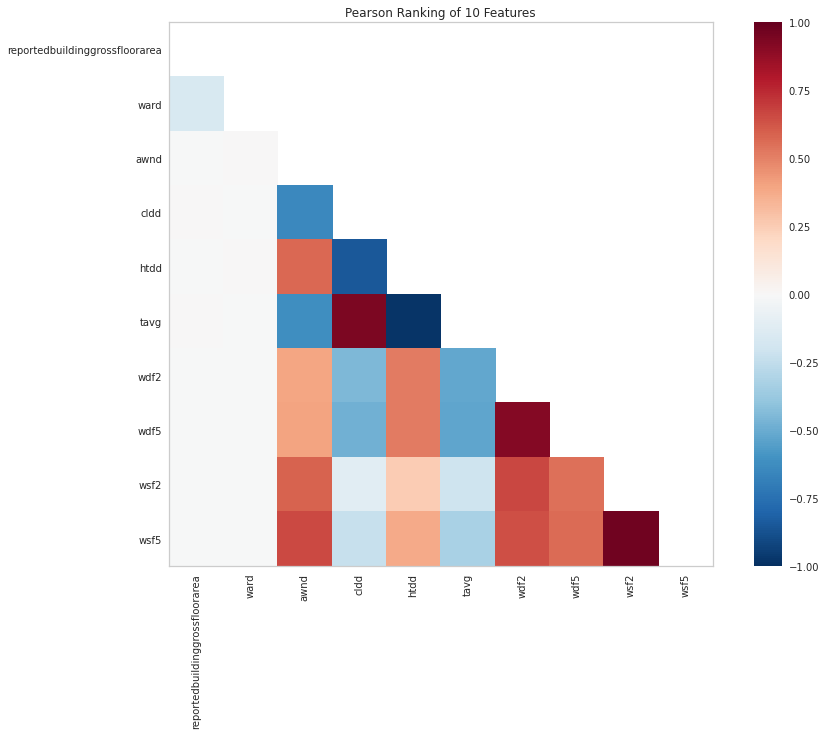

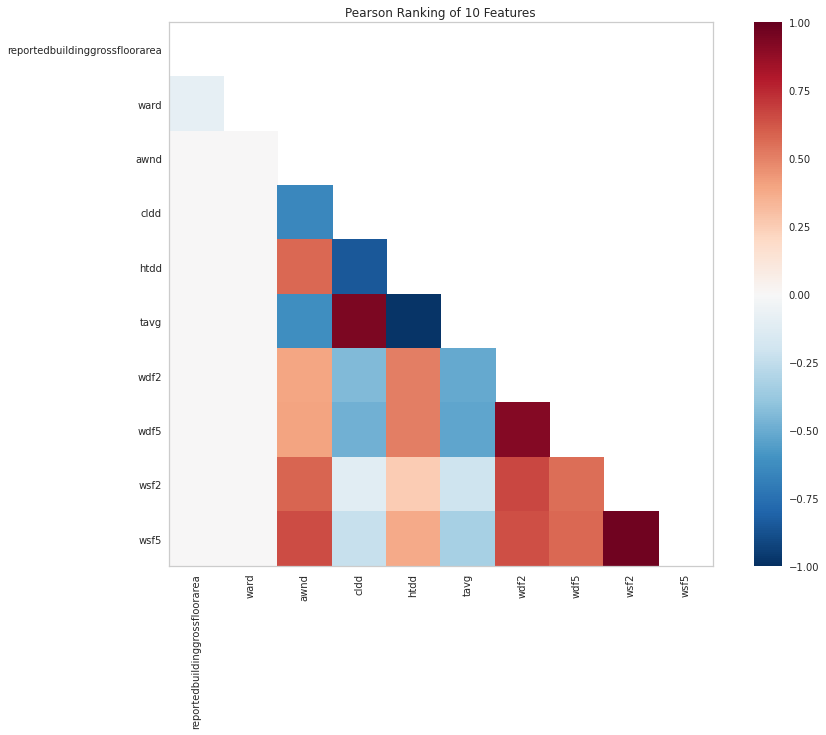

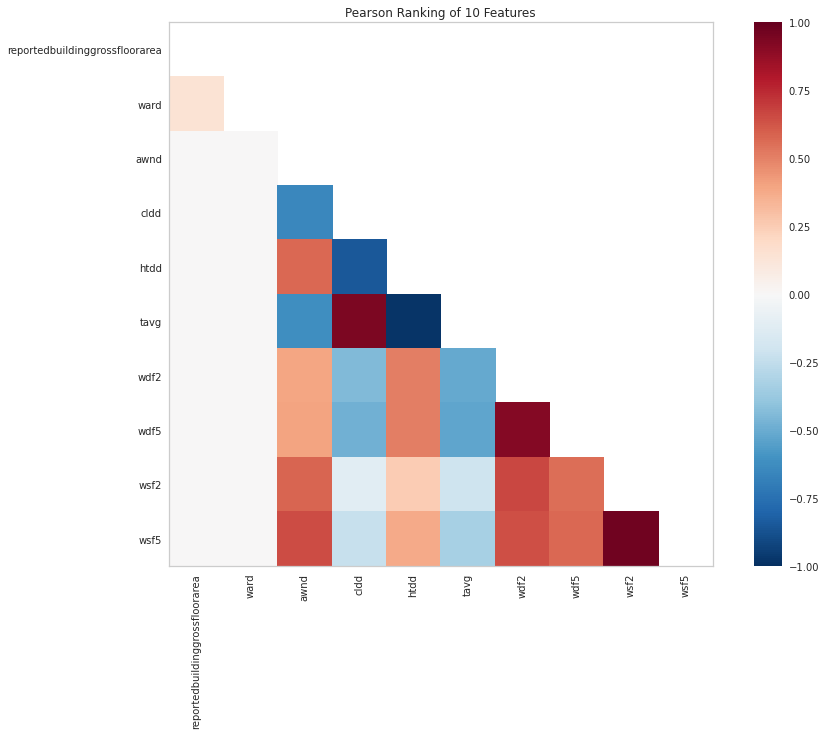

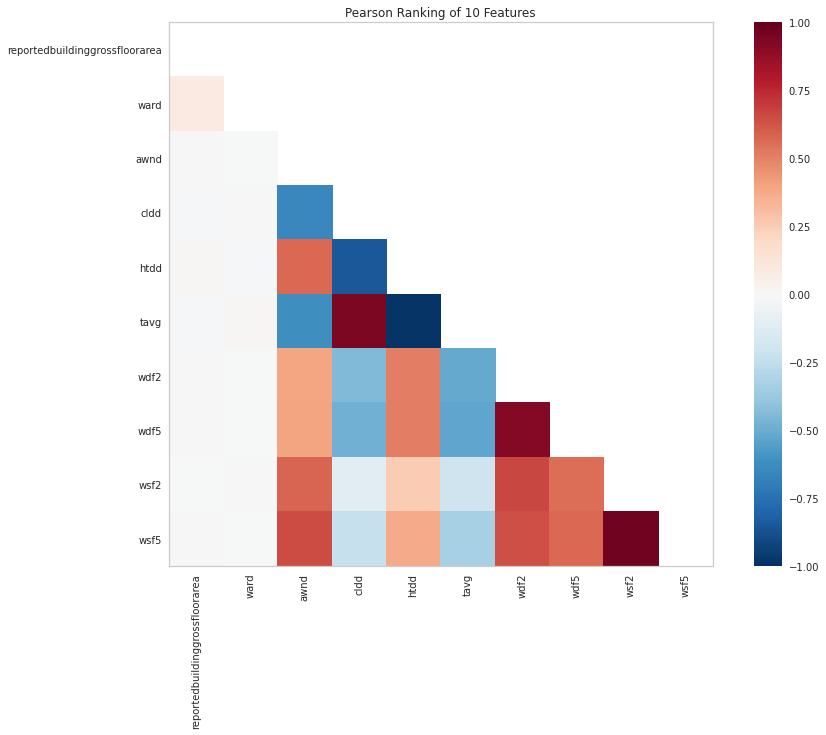

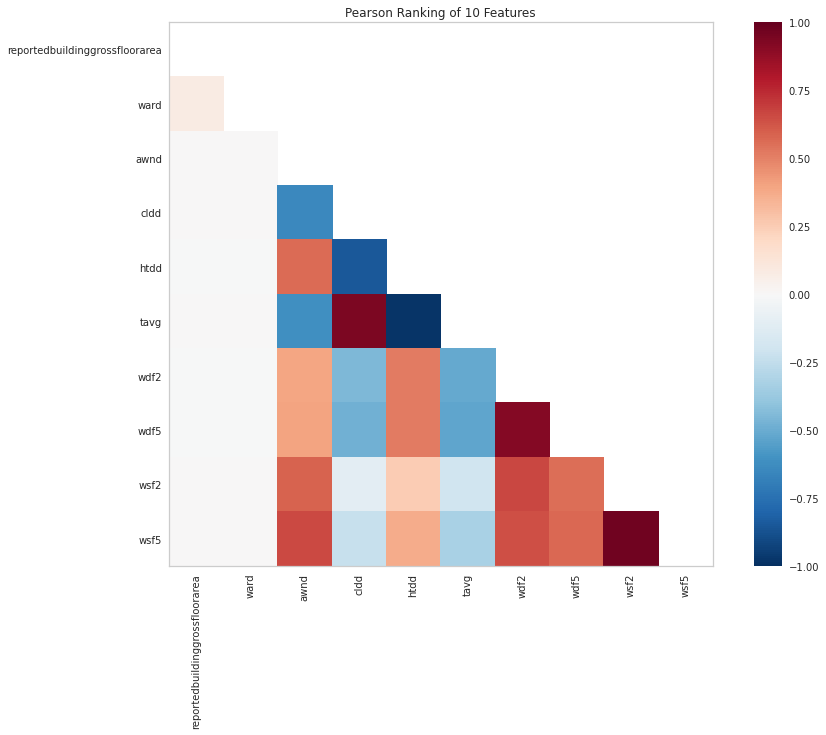

In [31]:
#Rank2D
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
for natdfsubset_2018 in natdfsubsets_2018:
    visualizer = Rank2D(algorithm='pearson', features=ft, size=(1080, 720))
    X,y = make_sklearn_data(natdfsubset_2018, cols=ft)
    visualizer.fit(X, y)
    visualizer.transform(X)
    visualizer.show()

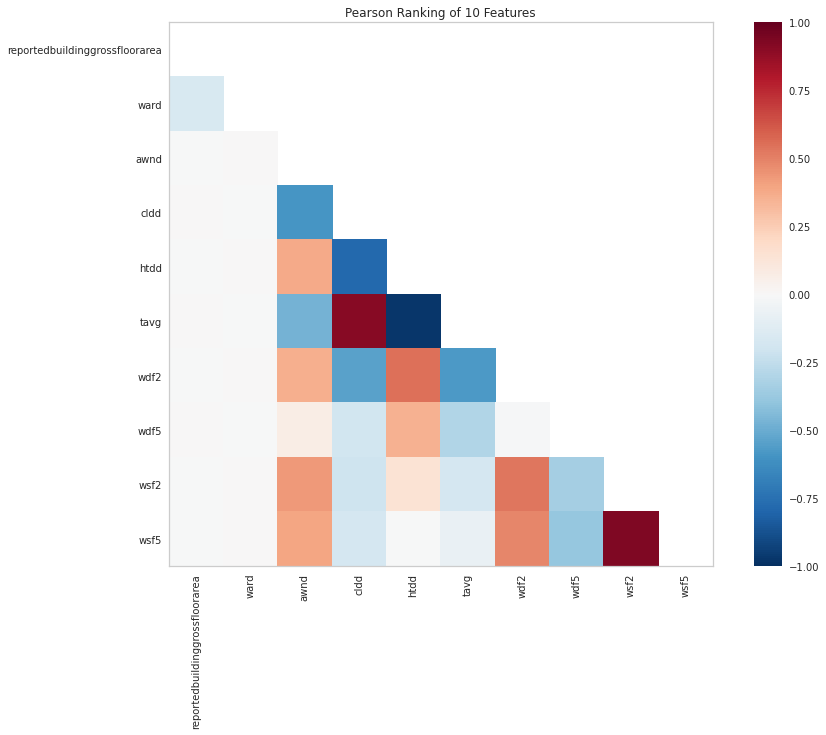

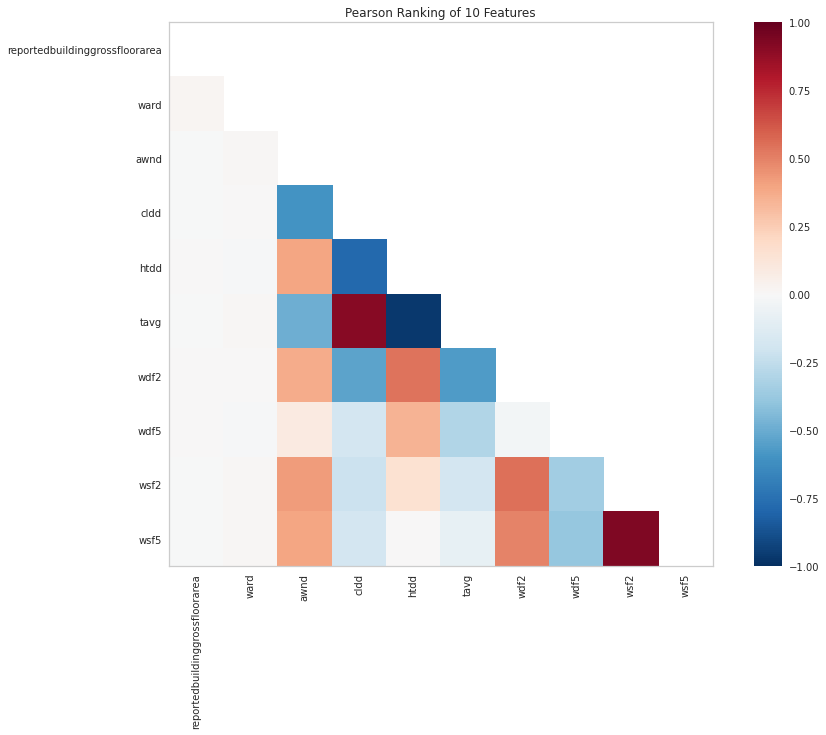

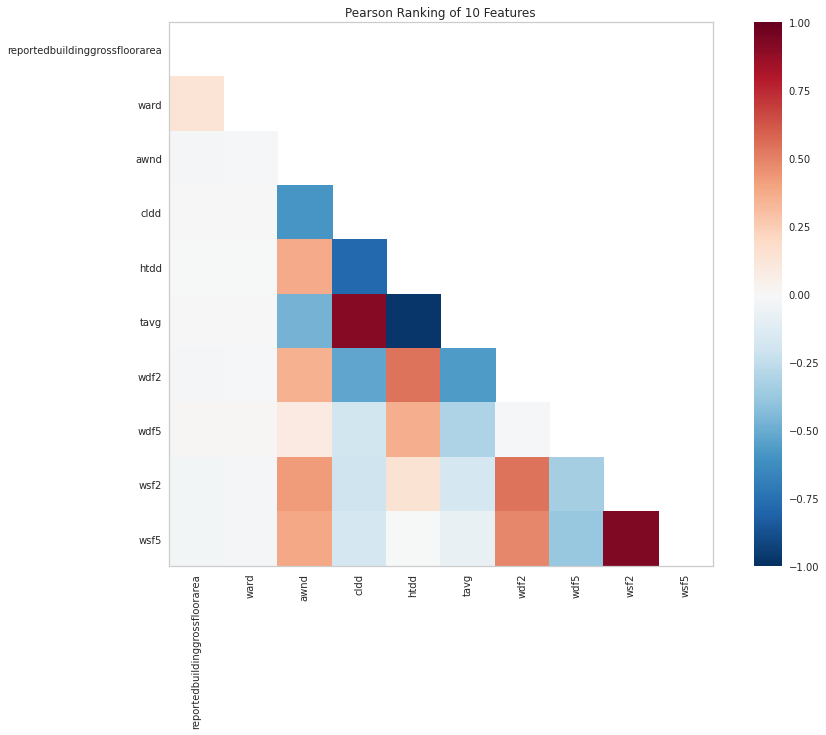

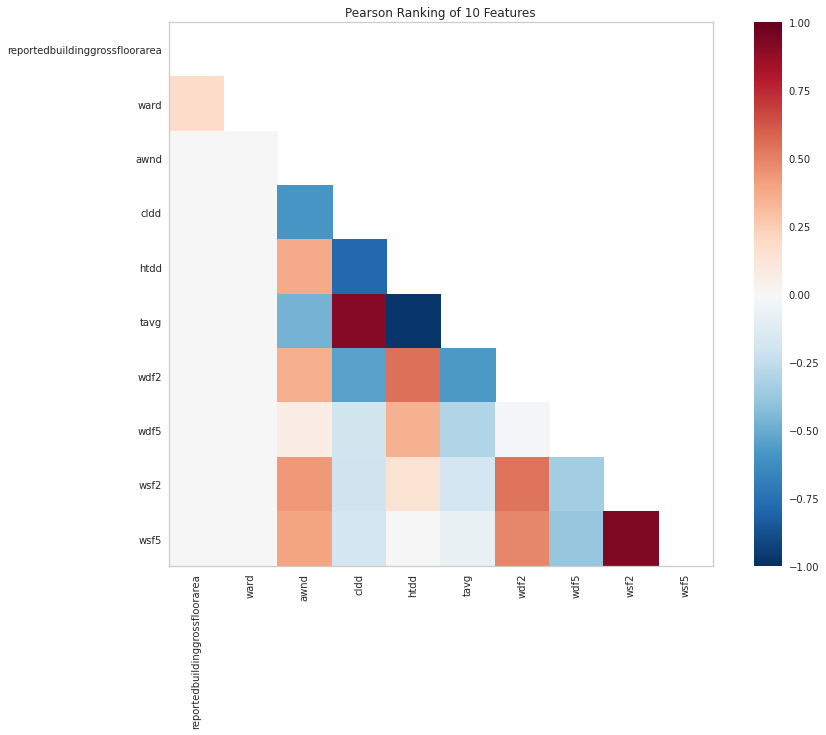

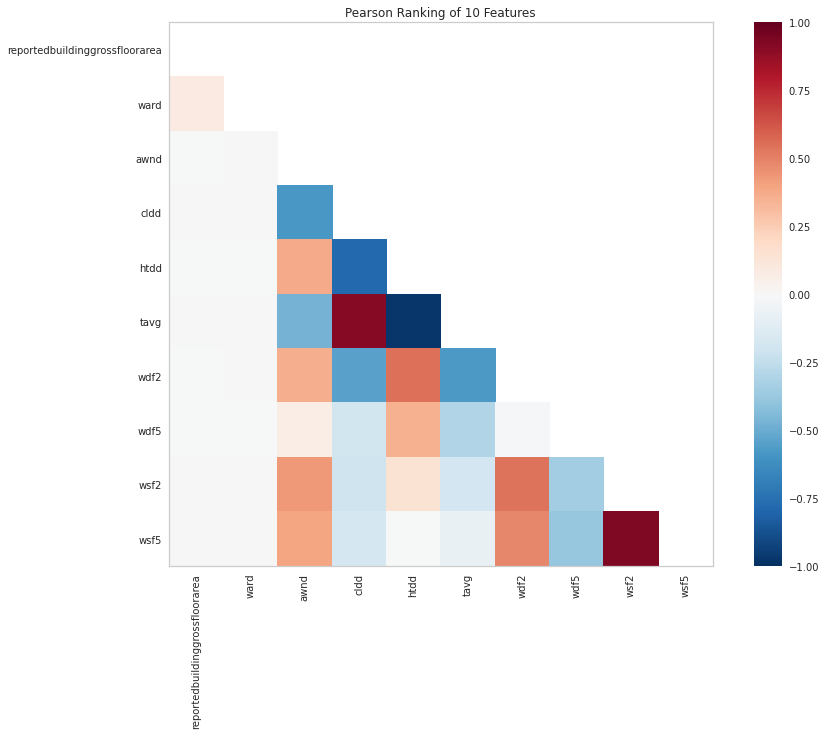

In [32]:
#Rank2D
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
for natdfsubset_2019 in natdfsubsets_2019:
    visualizer = Rank2D(algorithm='pearson', features=ft, size=(1080, 720))
    X,y = make_sklearn_data(natdfsubset_2019, cols=ft)
    visualizer.fit(X, y)
    visualizer.transform(X)
    visualizer.show()

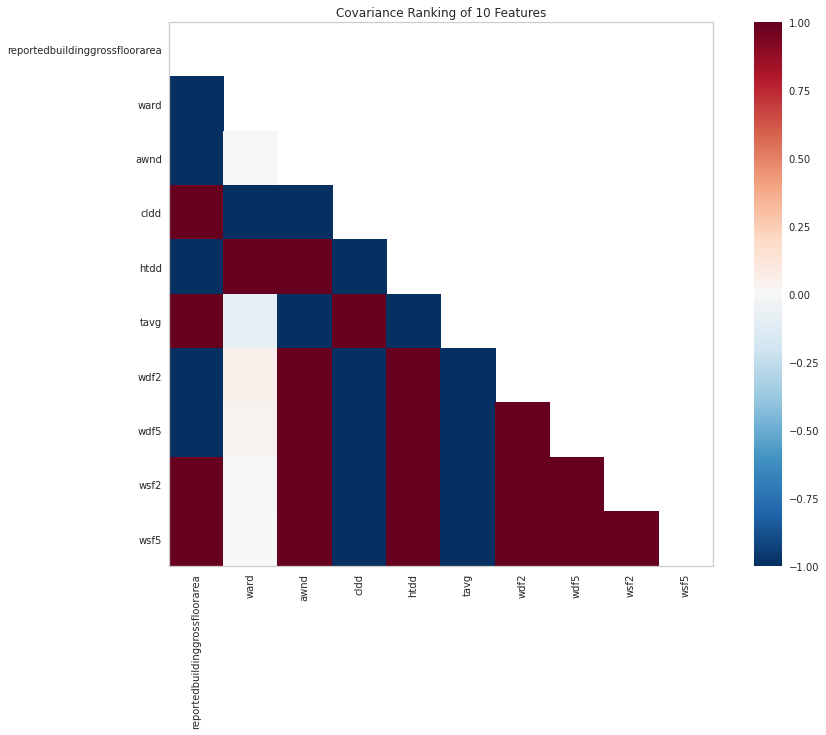

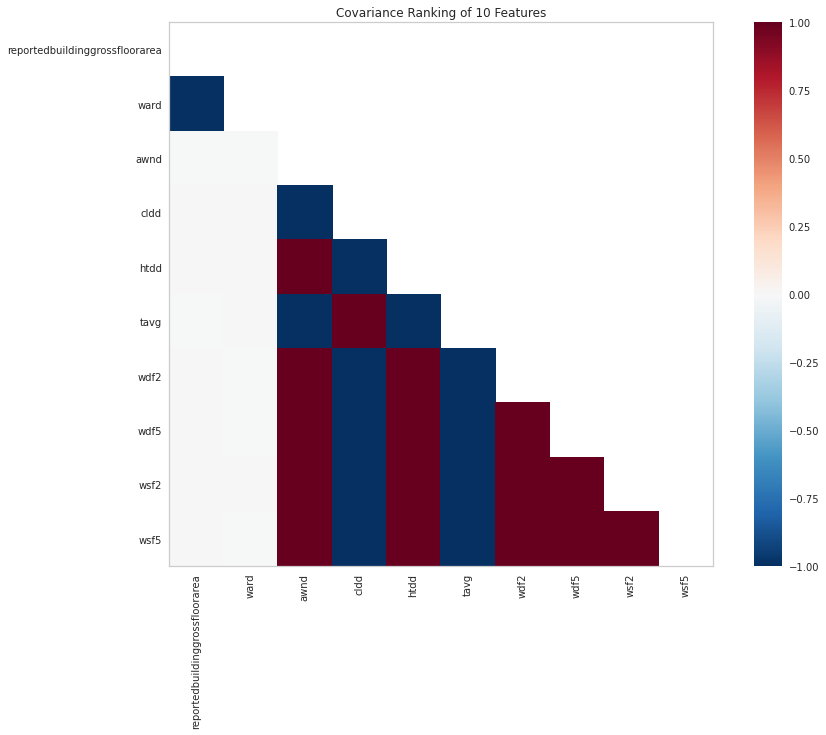

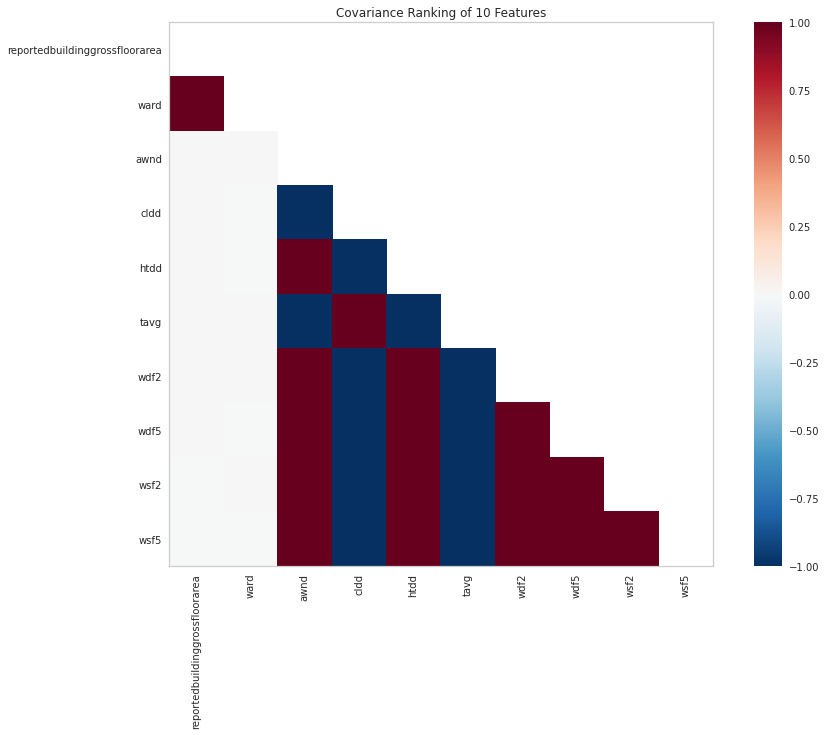

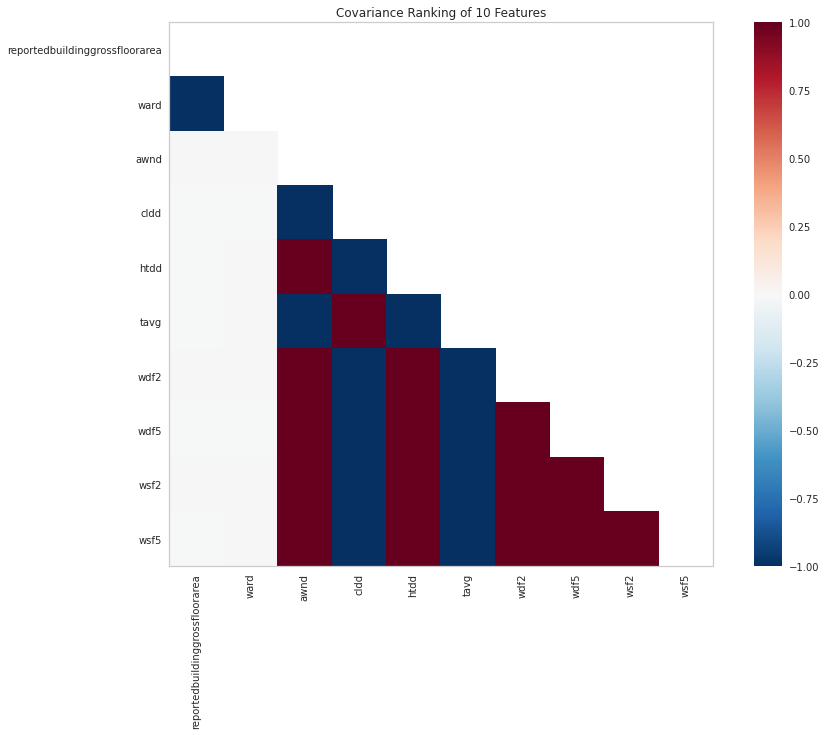

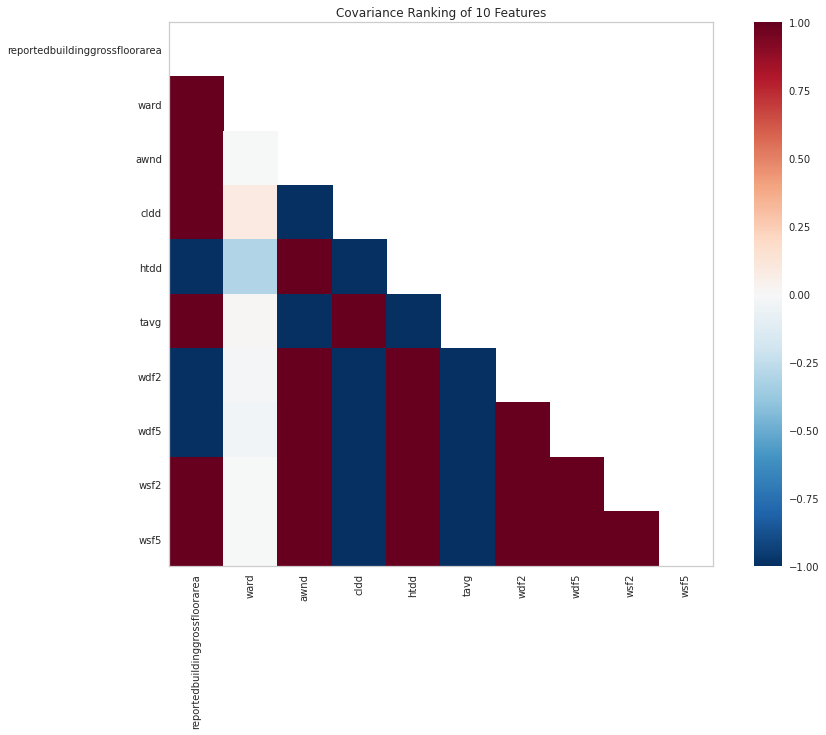

In [33]:
# Instantiate the visualizer with the Covariance algorithm
for eledfsubset_2018 in eledfsubsets_2018:
    visualizer = Rank2D(algorithm='covariance', features=ft, size=(1080, 720))
    X,y = make_sklearn_data(eledfsubset_2018, cols=ft)
    visualizer.fit(X, y)
    visualizer.transform(X)
    visualizer.show()

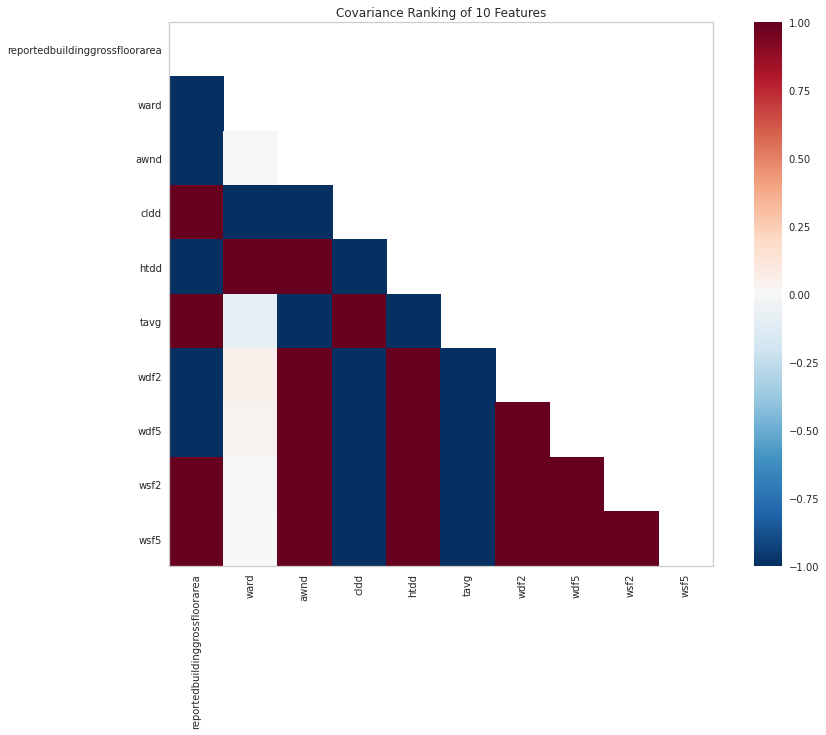

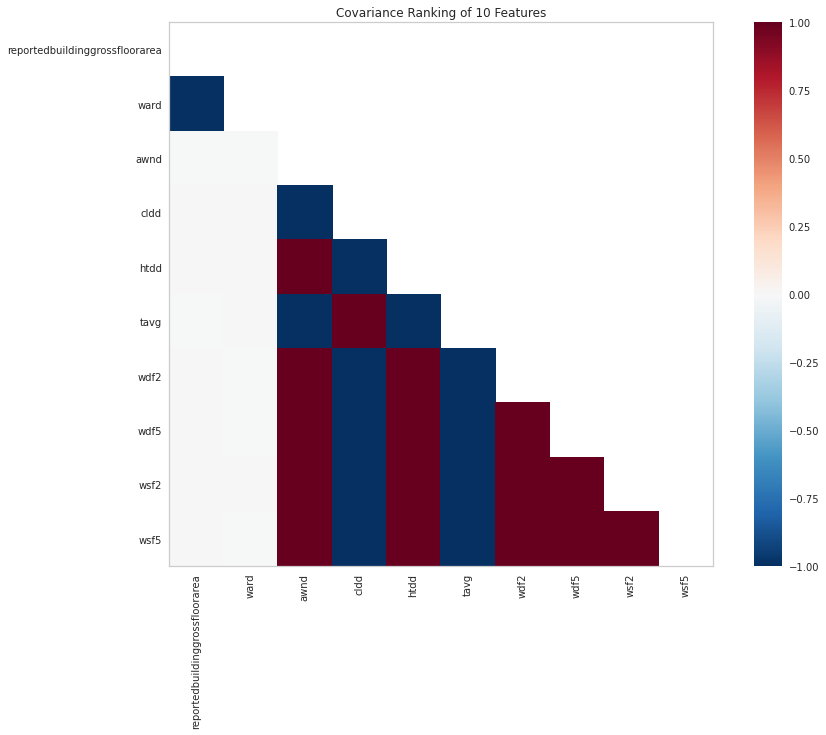

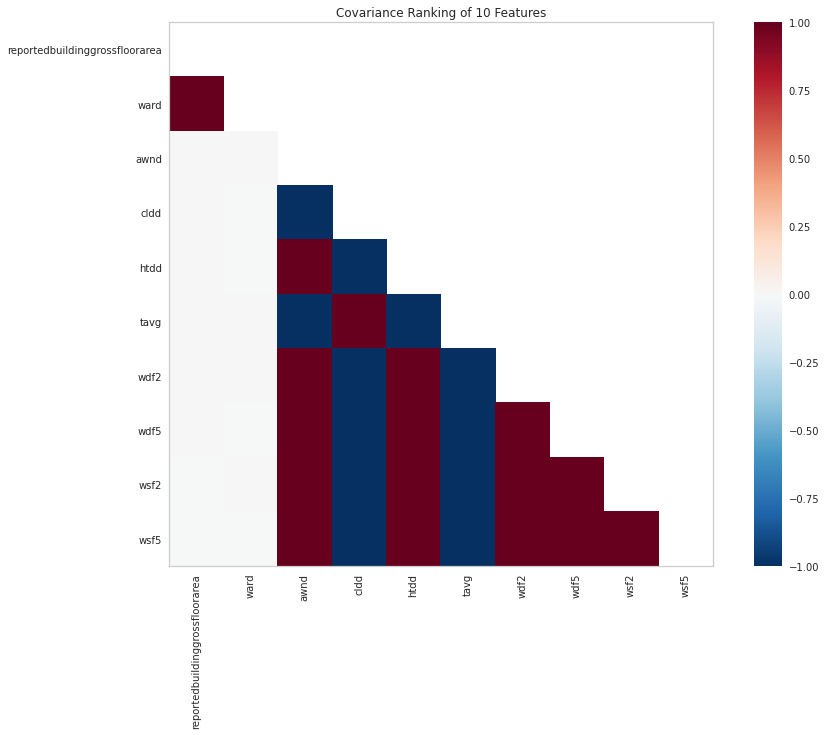

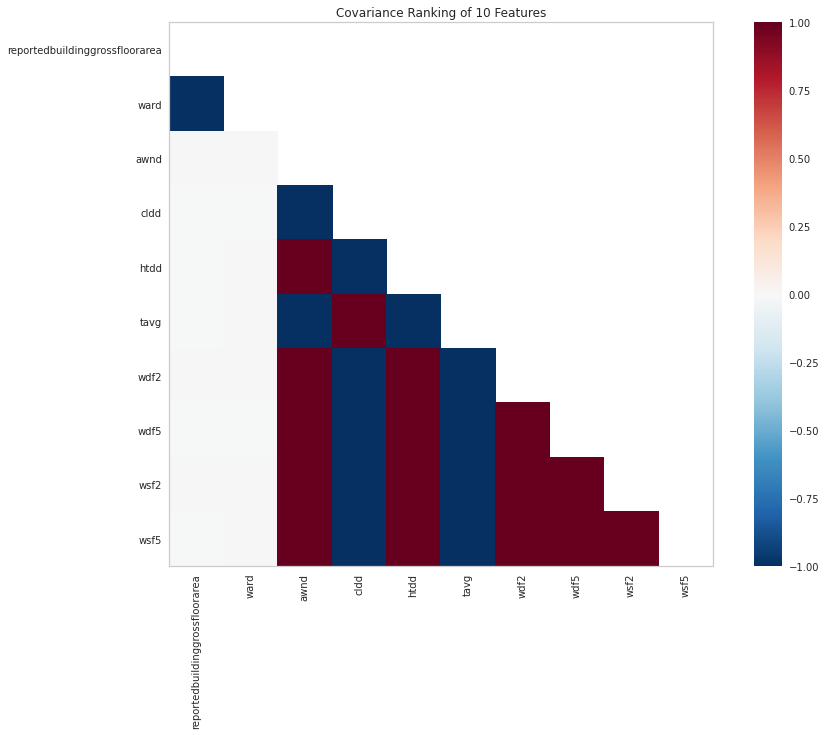

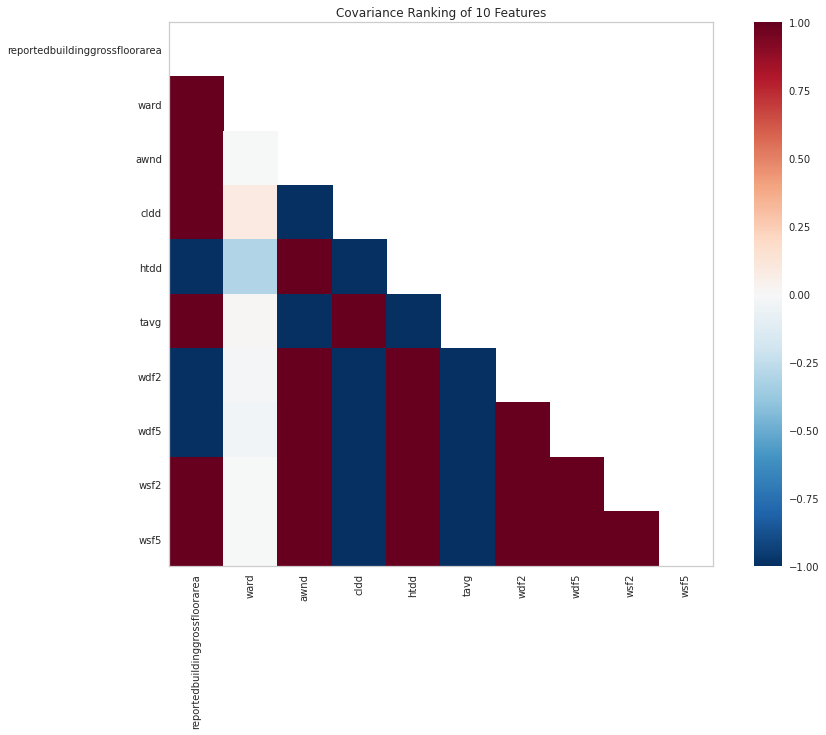

In [34]:
for eledfsubset_2019 in eledfsubsets_2019:
    visualizer = Rank2D(algorithm='covariance', features=ft, size=(1080, 720))
    X,y = make_sklearn_data(eledfsubset_2019, cols=ft)
    visualizer.fit(X, y)
    visualizer.transform(X)
    visualizer.show()

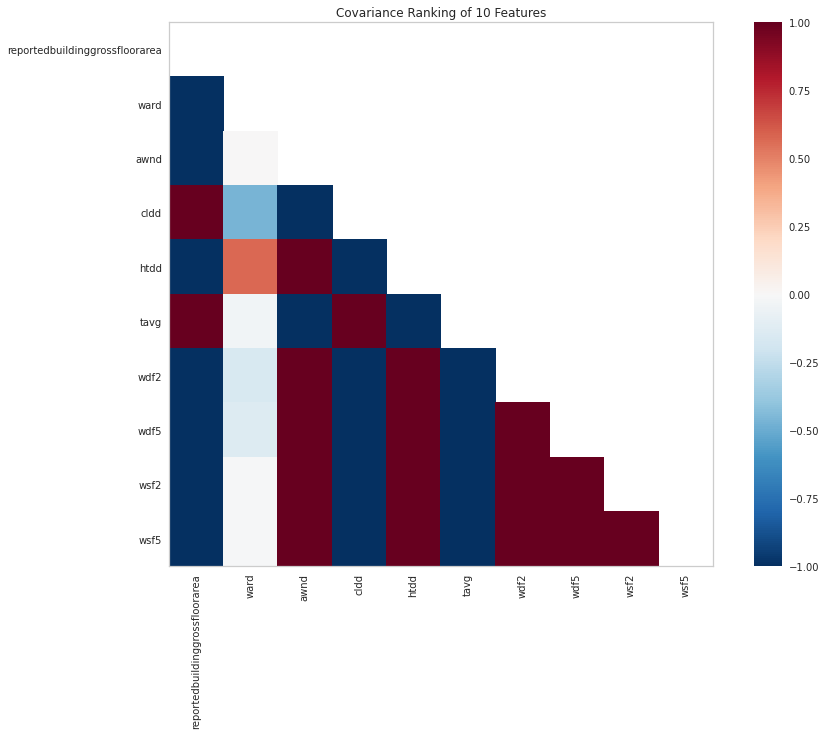

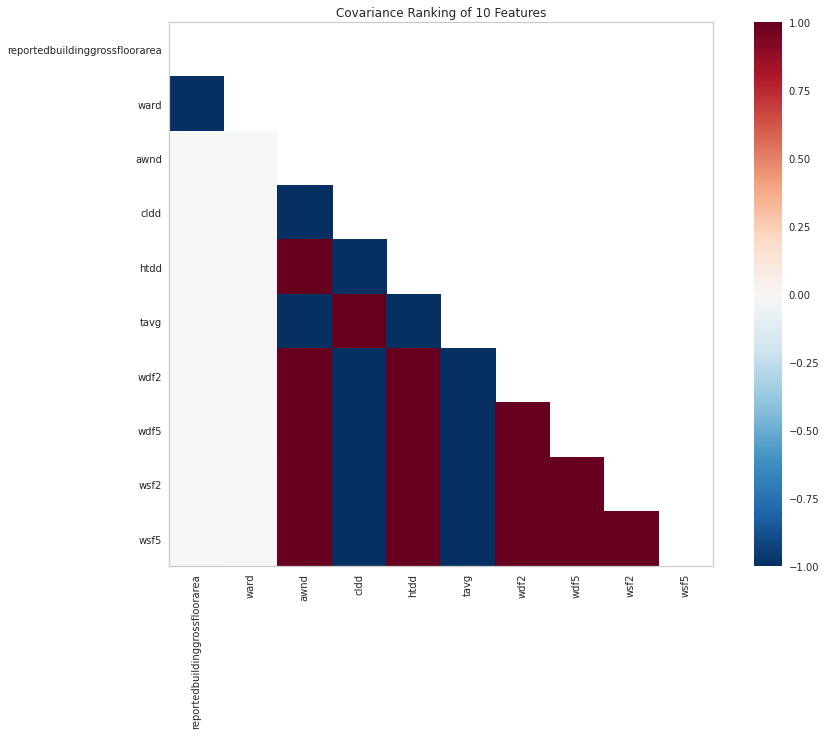

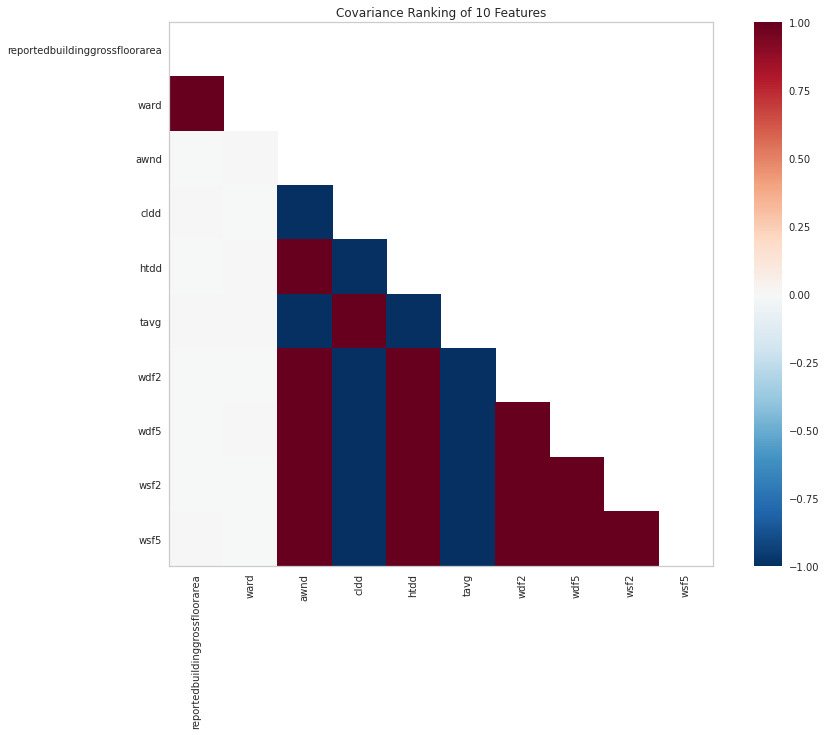

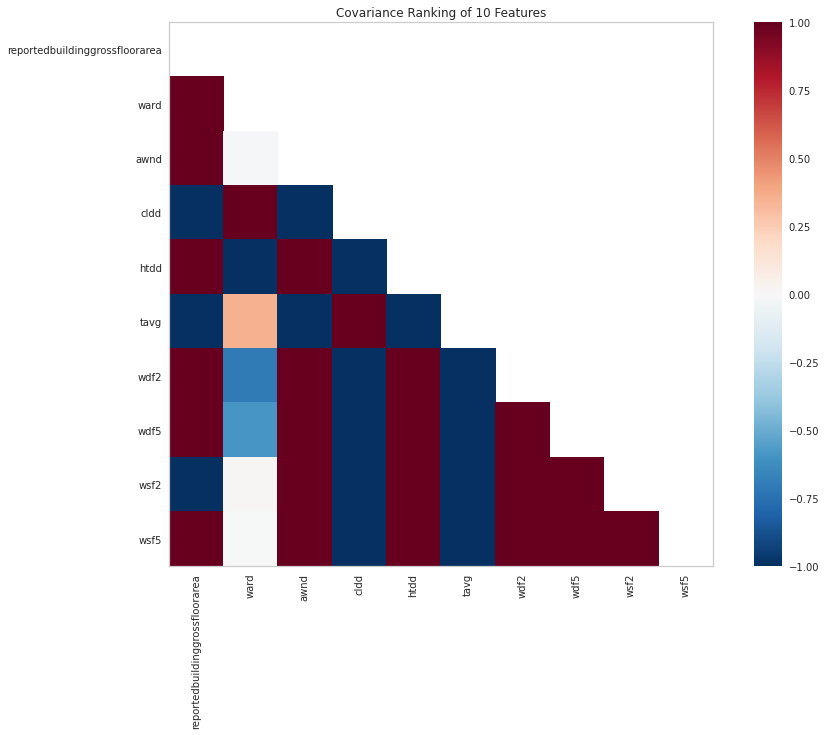

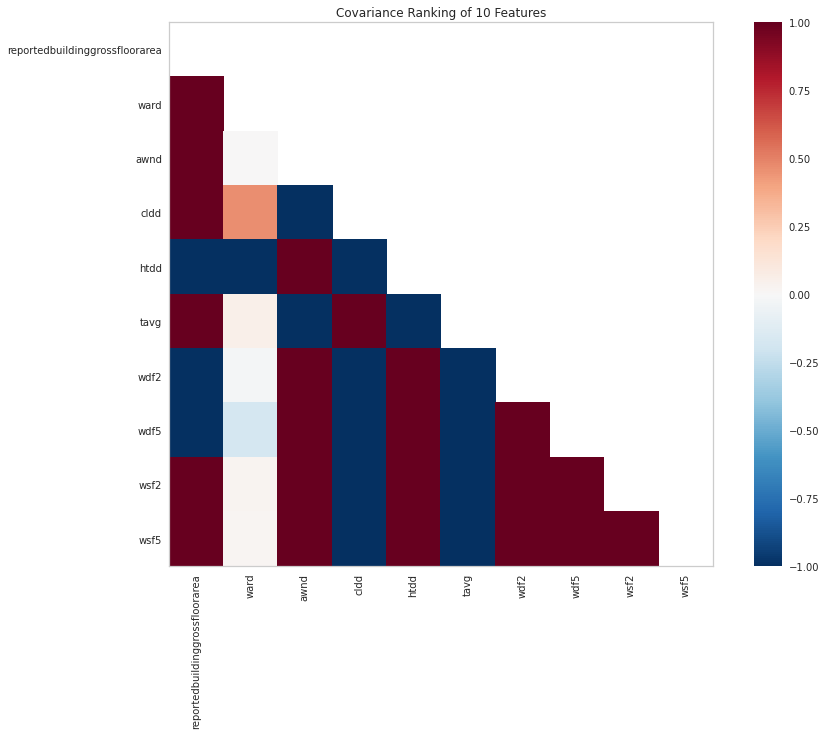

In [35]:
for natdfsubset_2018 in natdfsubsets_2018:
    visualizer = Rank2D(algorithm='covariance', features=ft, size=(1080, 720))
    X,y = make_sklearn_data(natdfsubset_2018, cols=ft)
    visualizer.fit(X, y)
    visualizer.transform(X)
    visualizer.show()

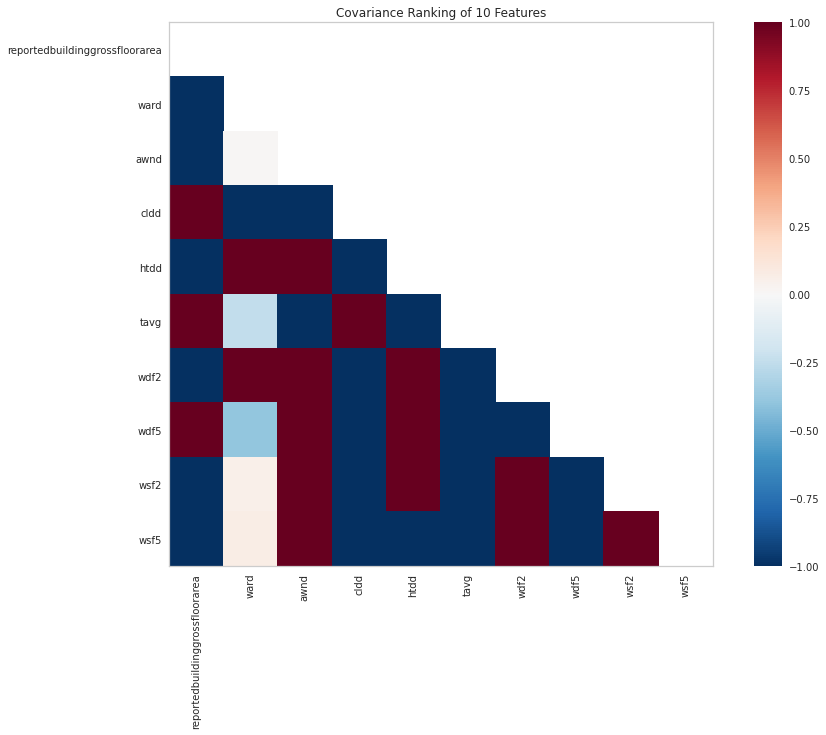

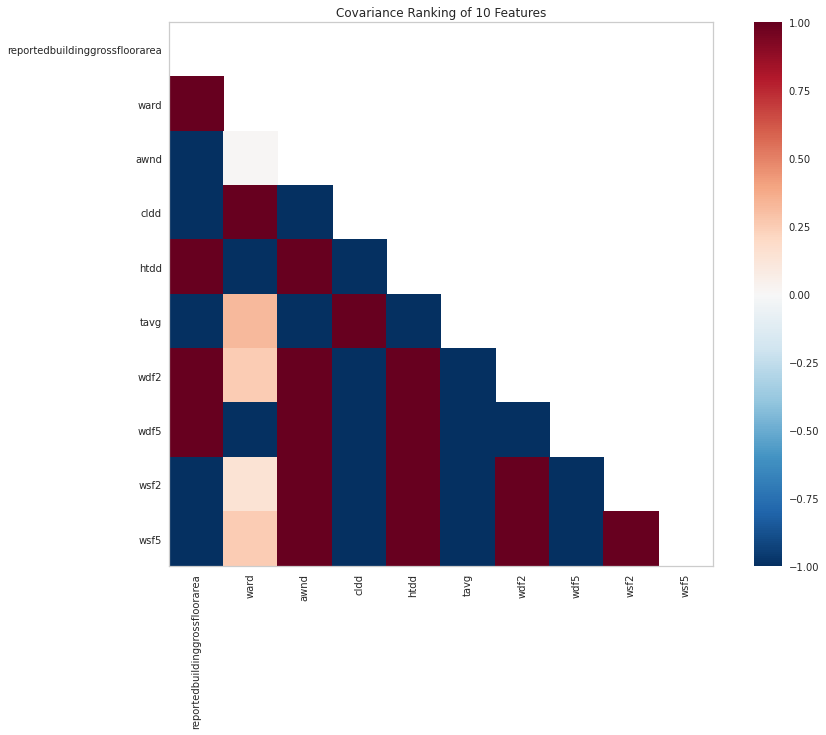

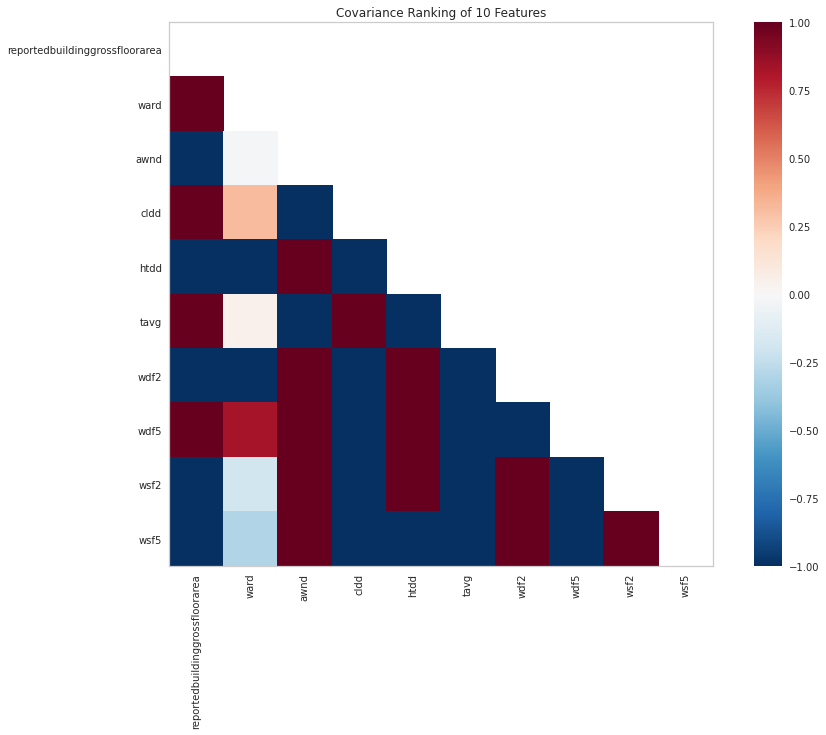

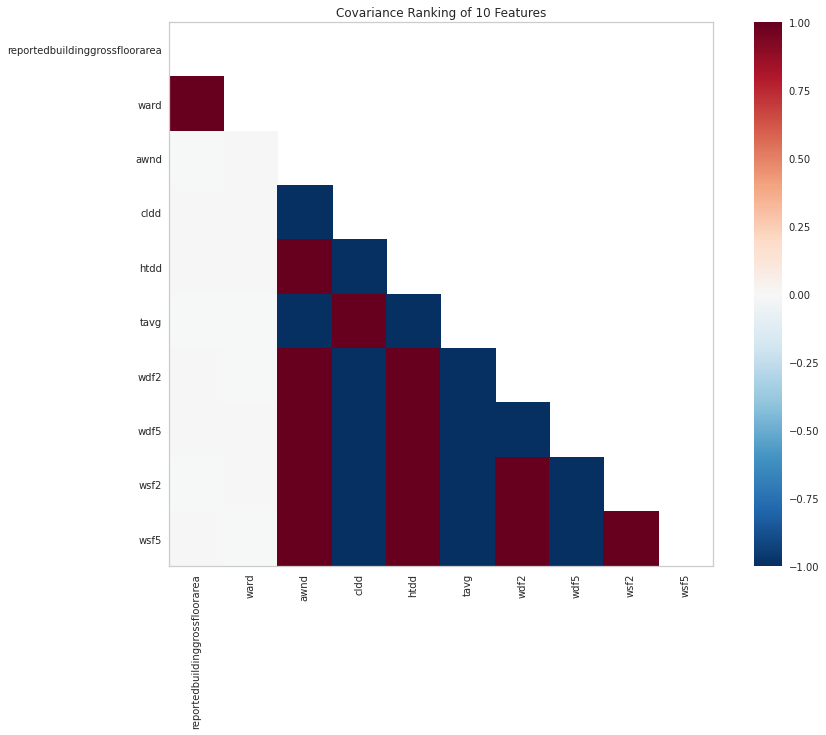

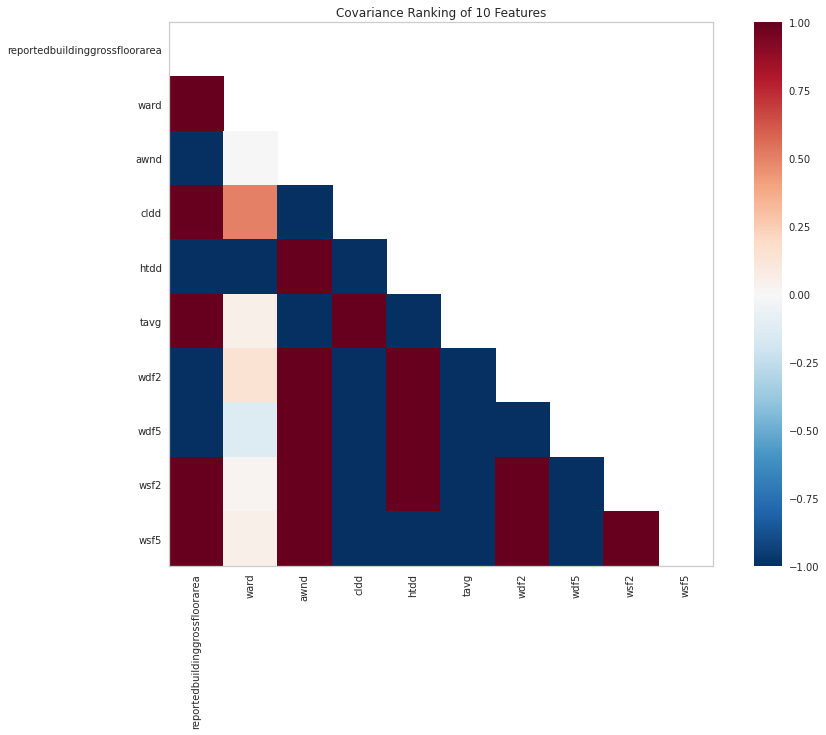

In [36]:
for natdfsubset_2019 in natdfsubsets_2019:
    visualizer = Rank2D(algorithm='covariance', features=ft, size=(1080, 720))
    X,y = make_sklearn_data(natdfsubset_2019, cols=ft)
    visualizer.fit(X, y)
    visualizer.transform(X)
    visualizer.show()

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


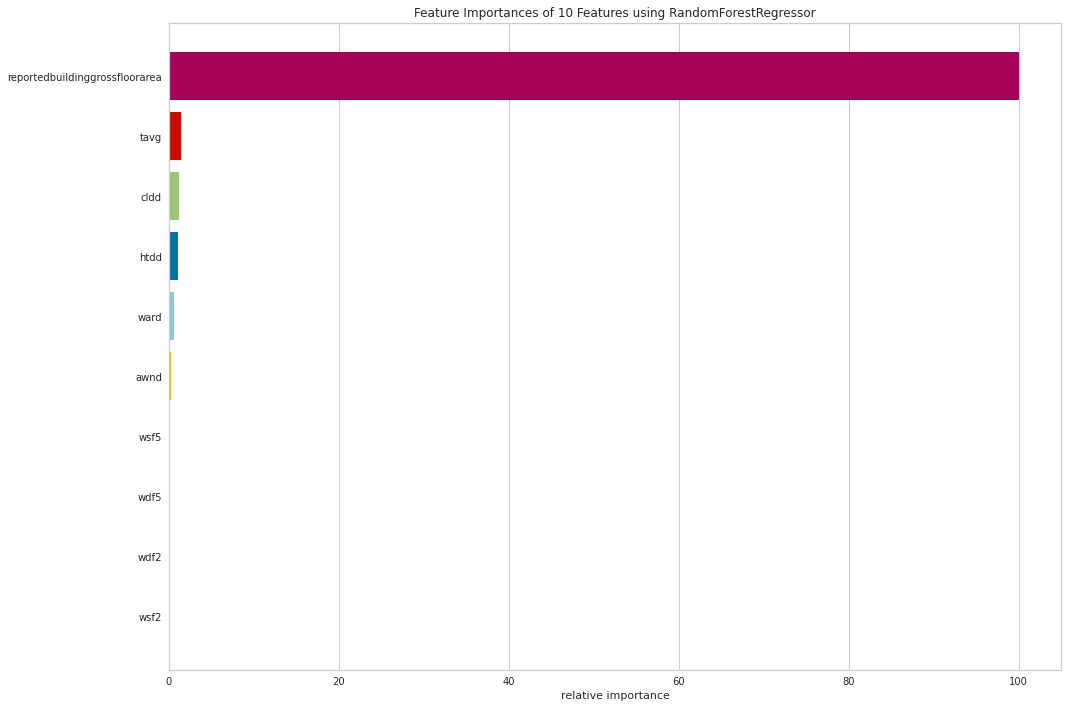

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


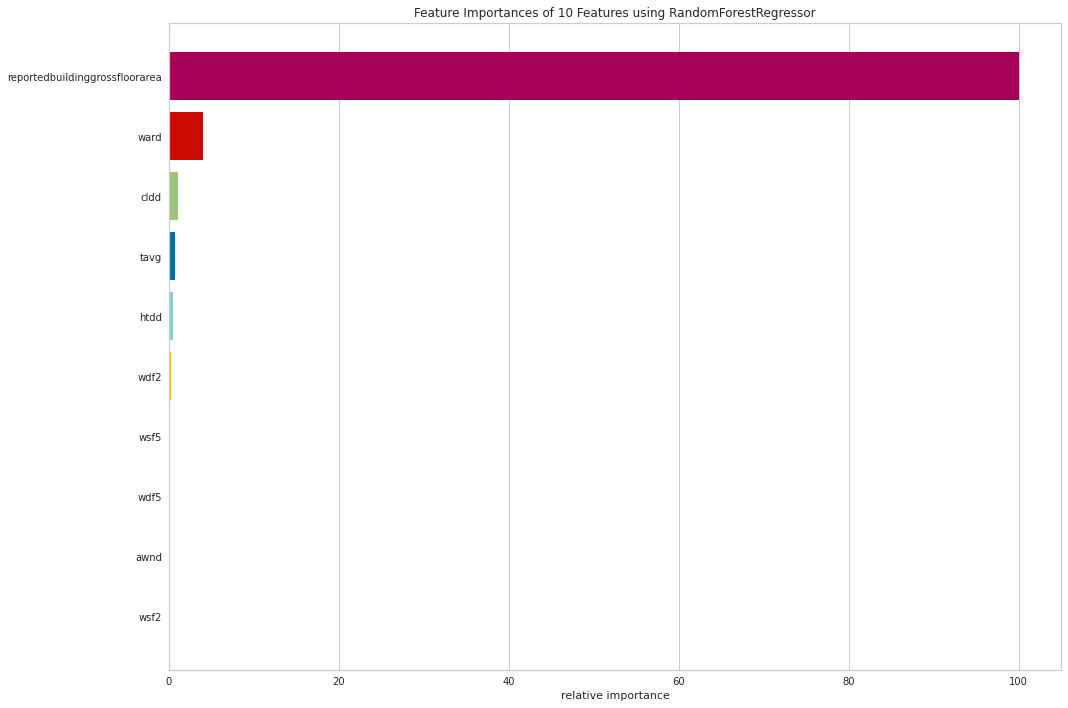

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


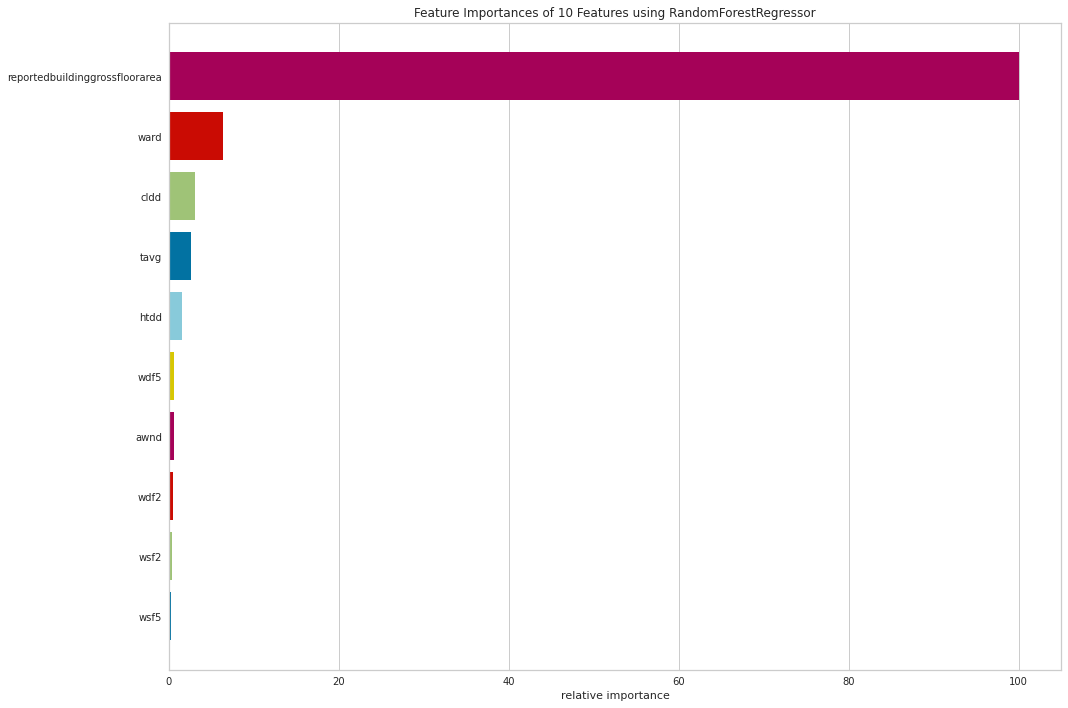

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


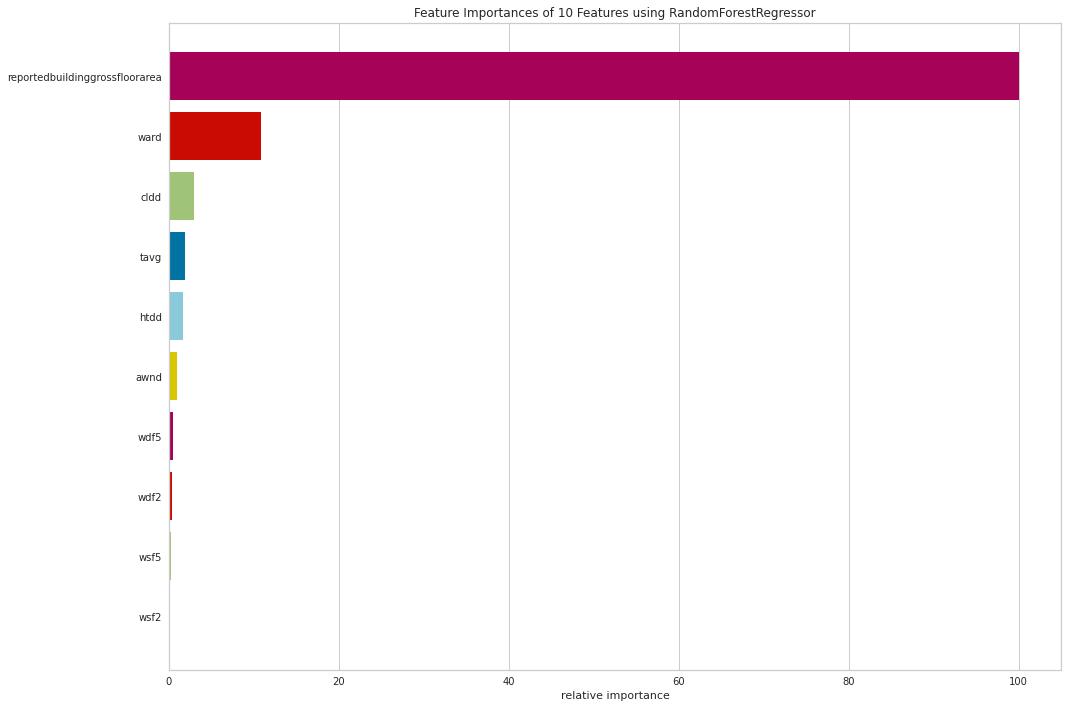

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


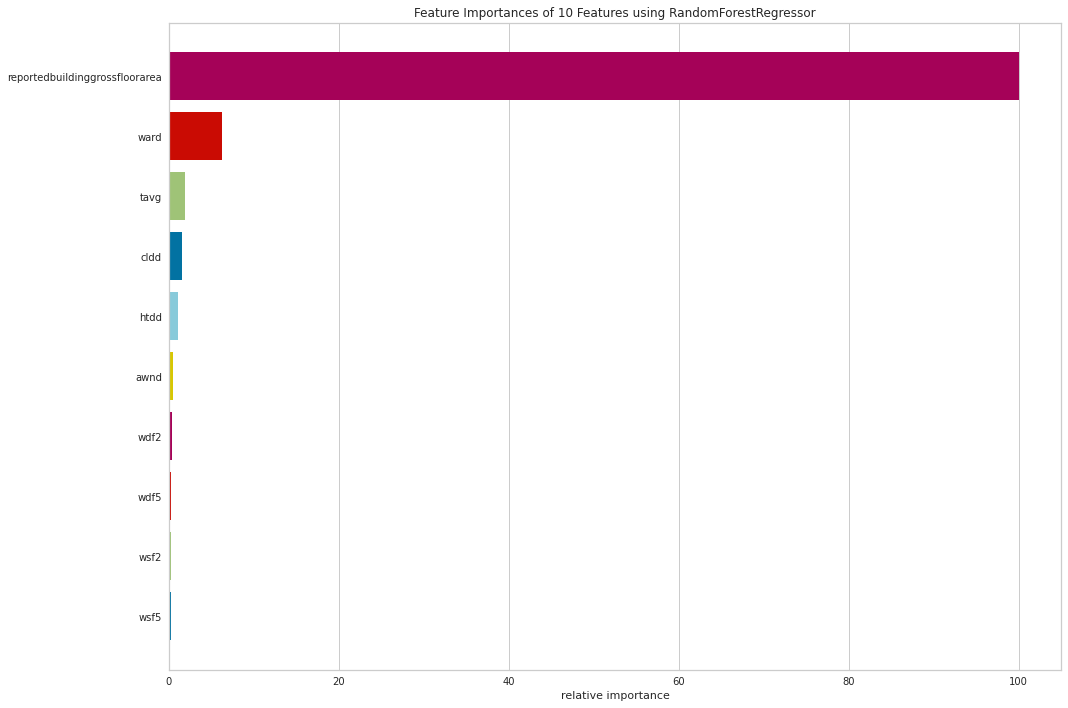

In [37]:
import yellowbrick as yb
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.features import RadViz
from yellowbrick.features import FeatureImportances

for eledfsubset_2018 in eledfsubsets_2018:
    model = RandomForestRegressor(n_estimators=10)
    viz = FeatureImportances(model, labels=ft, size=(1080, 720))
    X,y = make_sklearn_data(eledfsubset_2018, cols=ft)
    viz.fit(X, y)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
    viz.show()

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


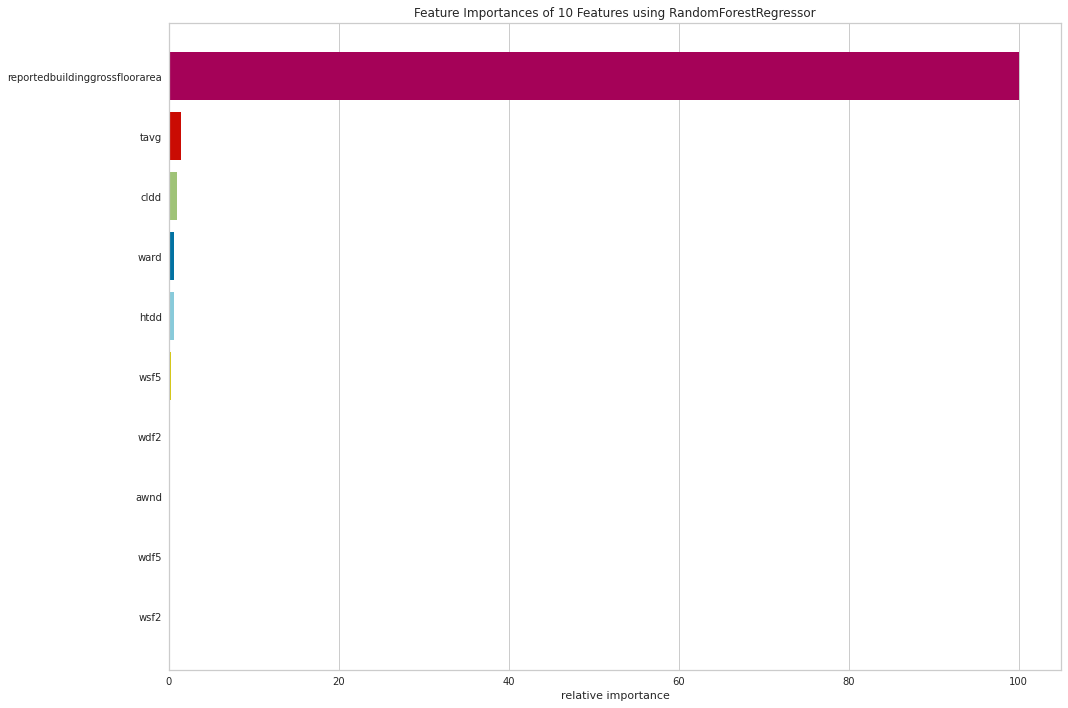

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


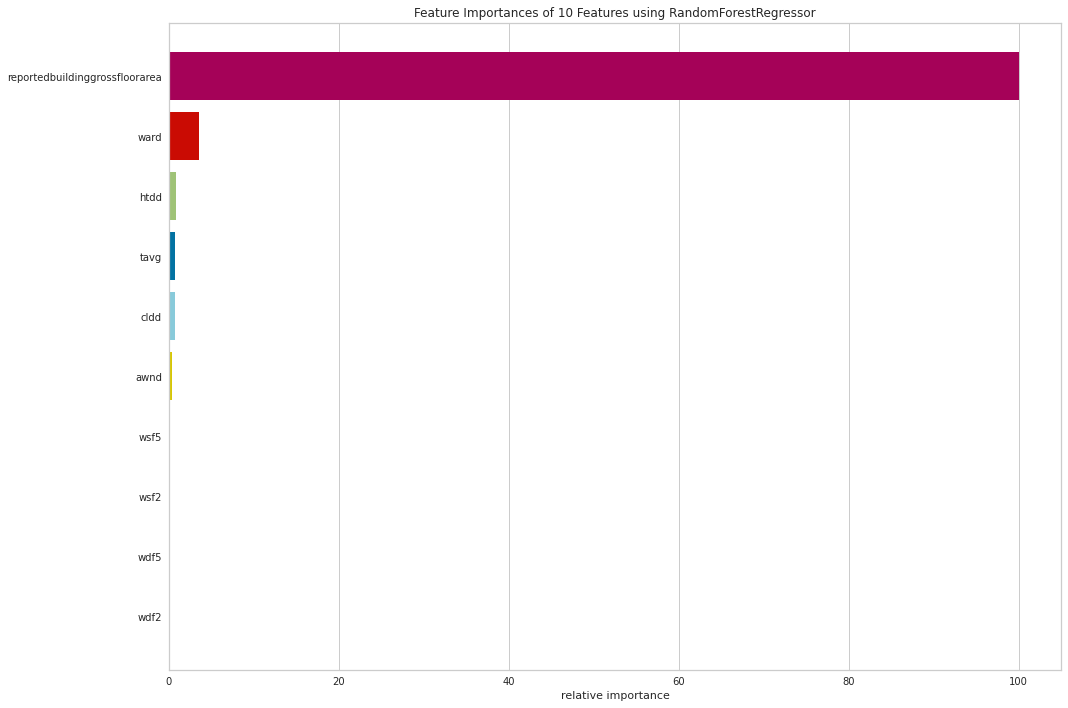

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


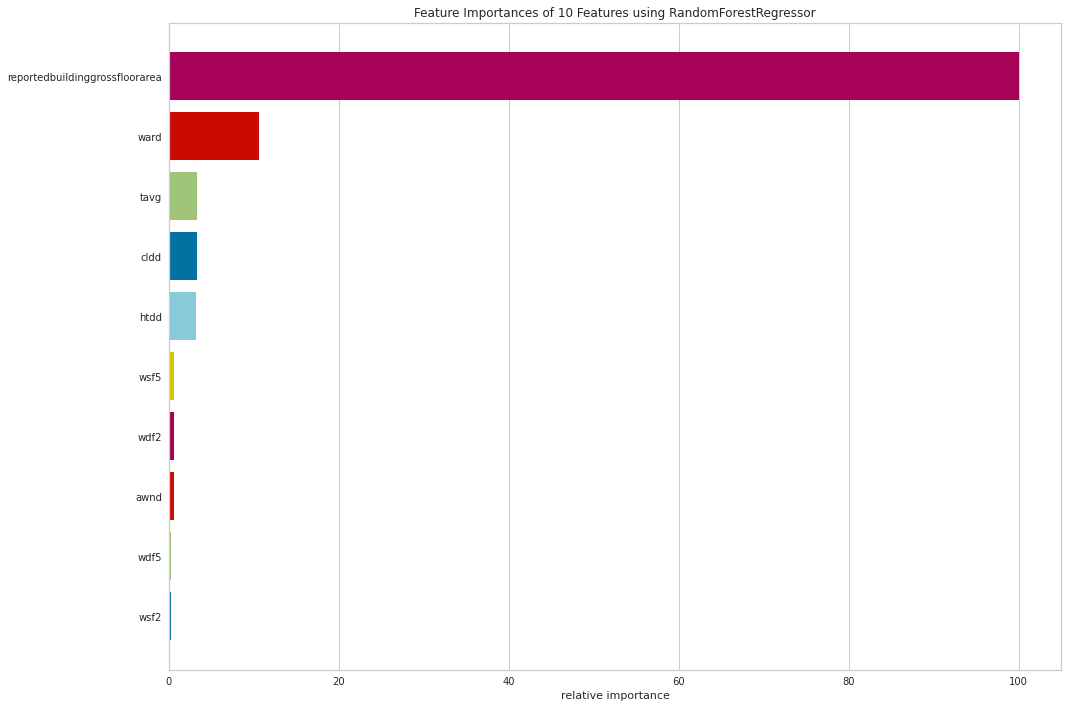

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


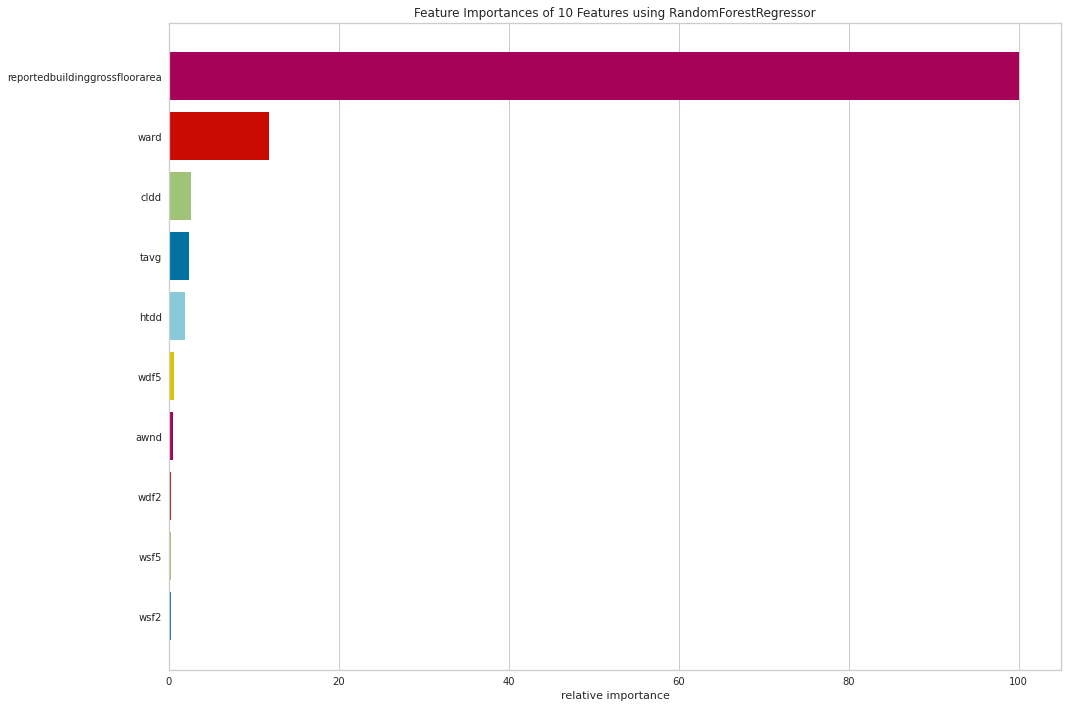

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


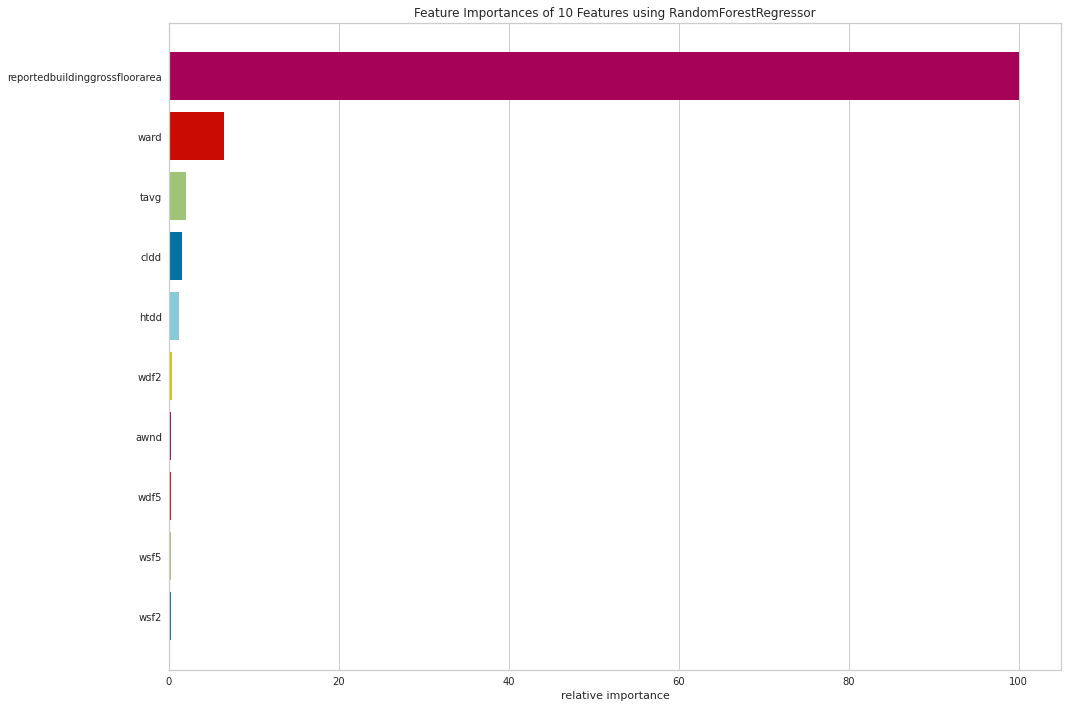

In [38]:
import yellowbrick as yb
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.features import RadViz
from yellowbrick.features import FeatureImportances

for eledfsubset_2019 in eledfsubsets_2019:
    model = RandomForestRegressor(n_estimators=10)
    viz = FeatureImportances(model, labels=ft, size=(1080, 720))
    X,y = make_sklearn_data(eledfsubset_2019,cols=ft)
    viz.fit(X, y)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
    viz.show()

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


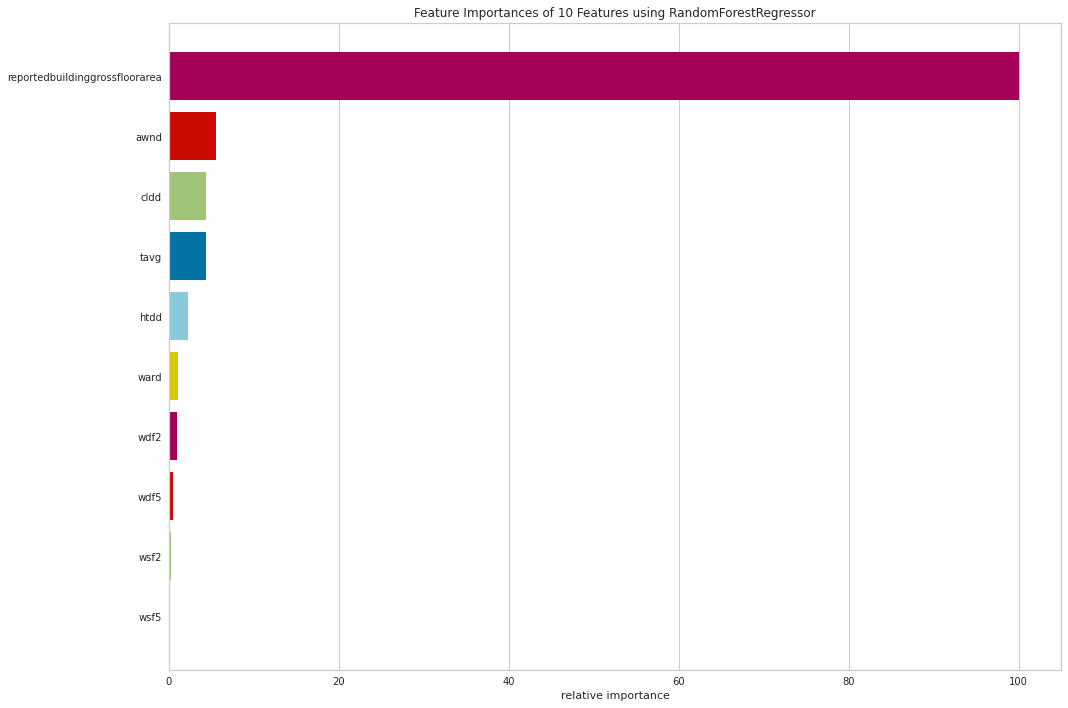

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


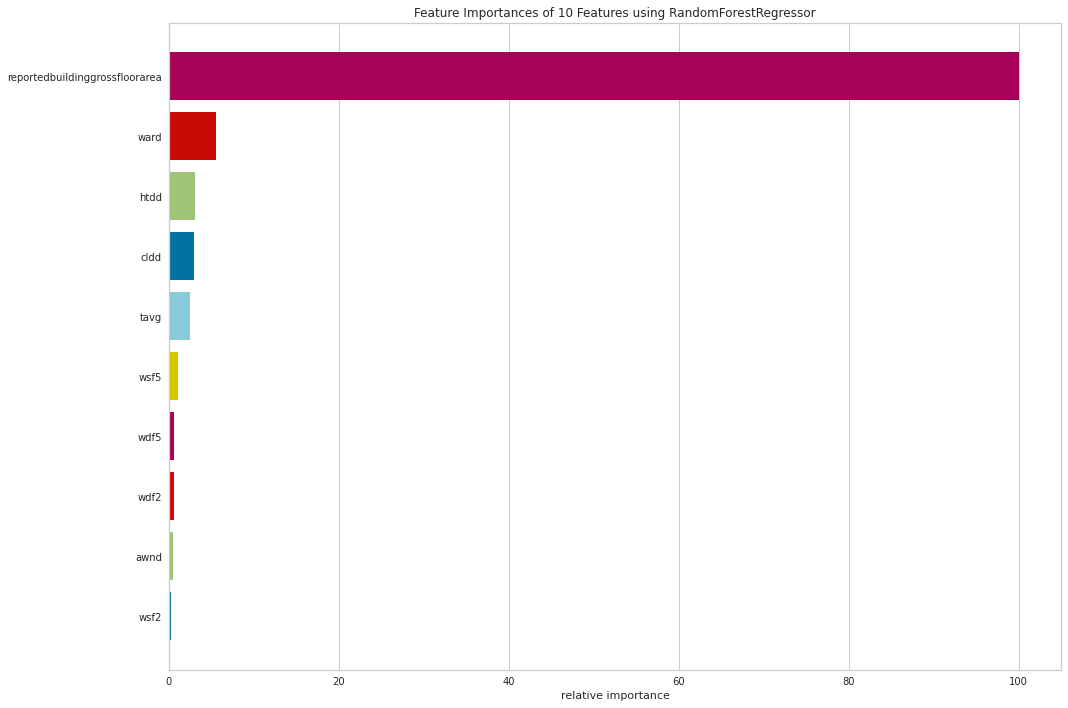

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


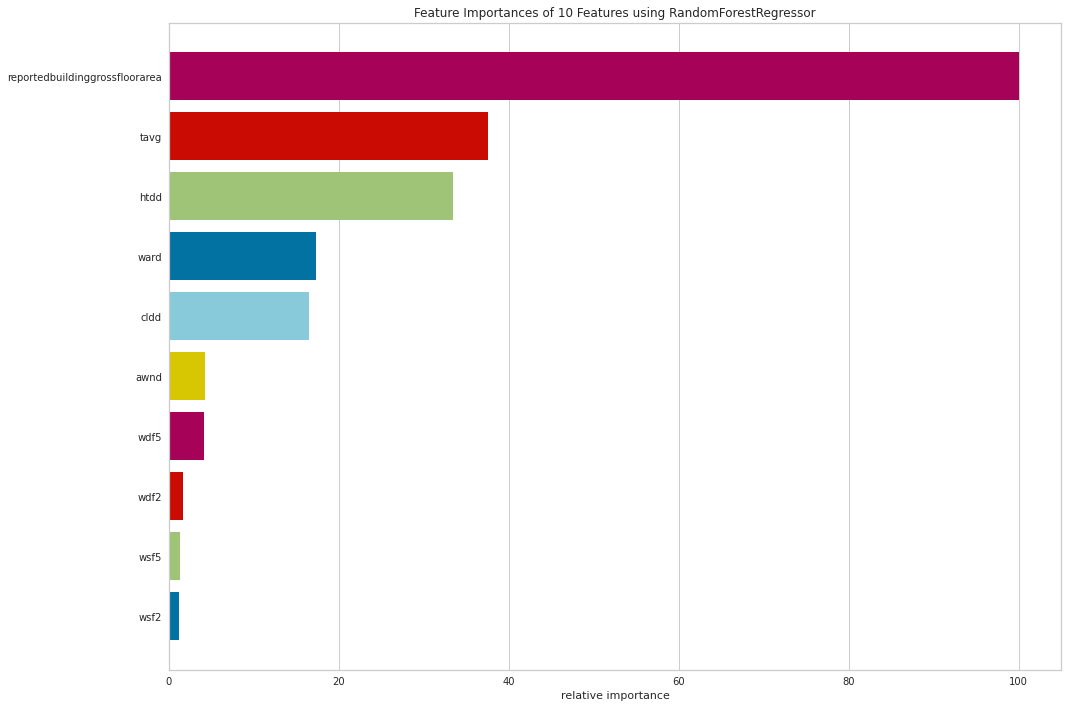

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


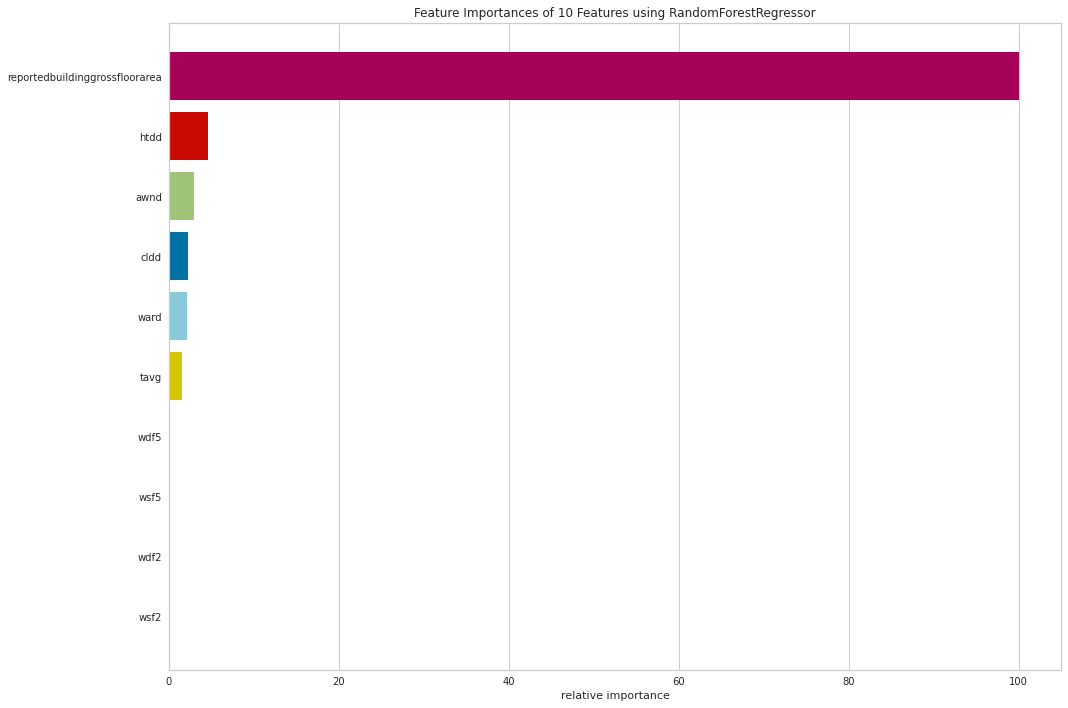

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


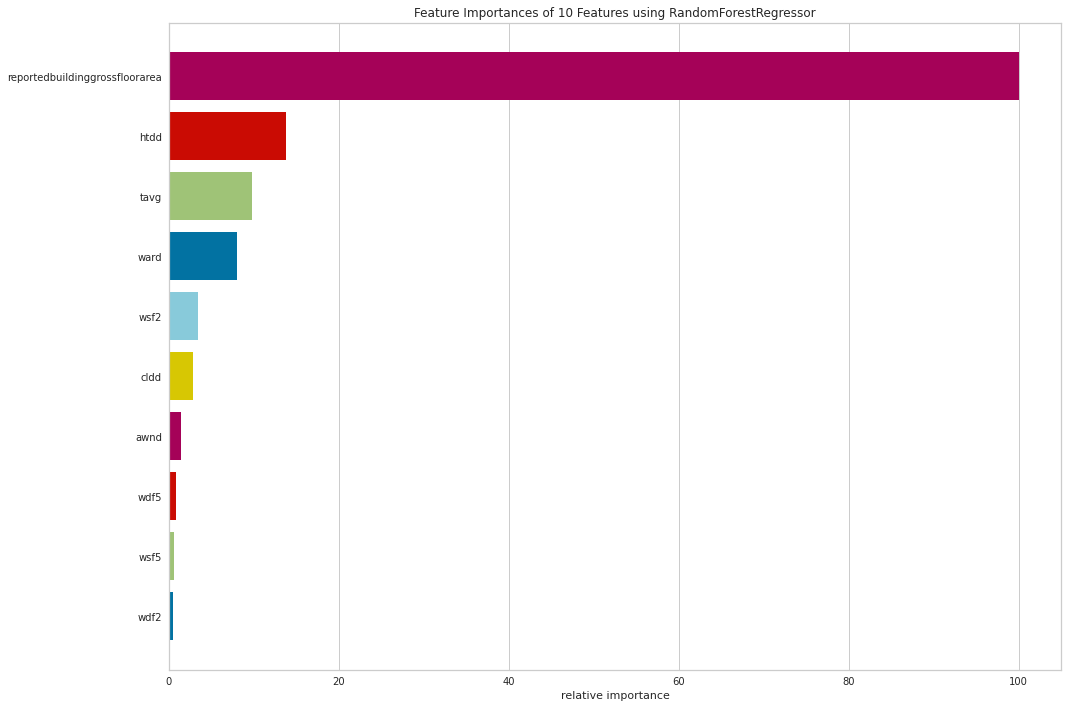

In [39]:
import yellowbrick as yb
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.features import RadViz
from yellowbrick.features import FeatureImportances

for natdfsubset_2018 in natdfsubsets_2018:
    model = RandomForestRegressor(n_estimators=10)
    viz = FeatureImportances(model, labels=ft, size=(1080, 720))
    X,y = make_sklearn_data(natdfsubset_2018, cols=ft)
    viz.fit(X, y)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
    viz.show()

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


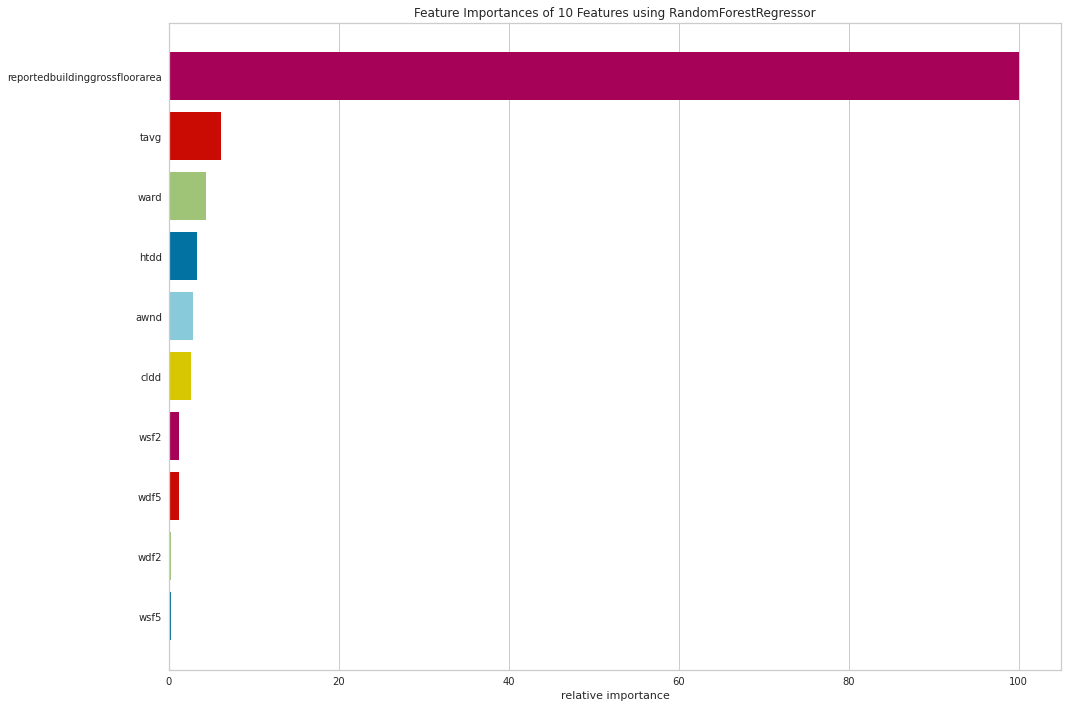

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


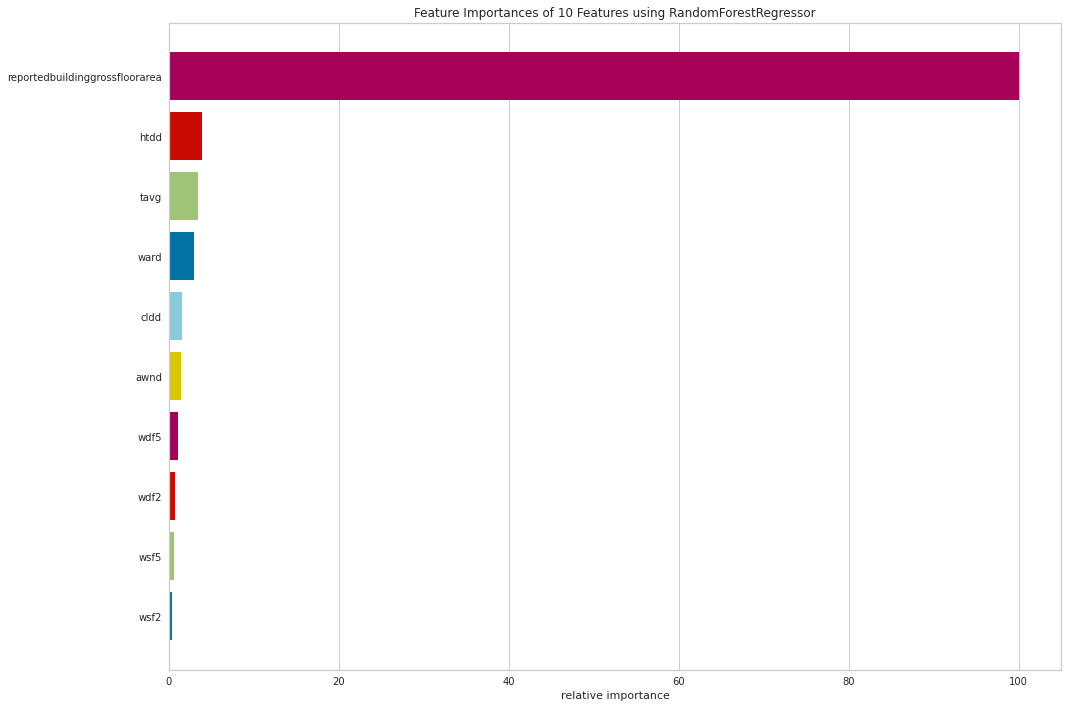

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


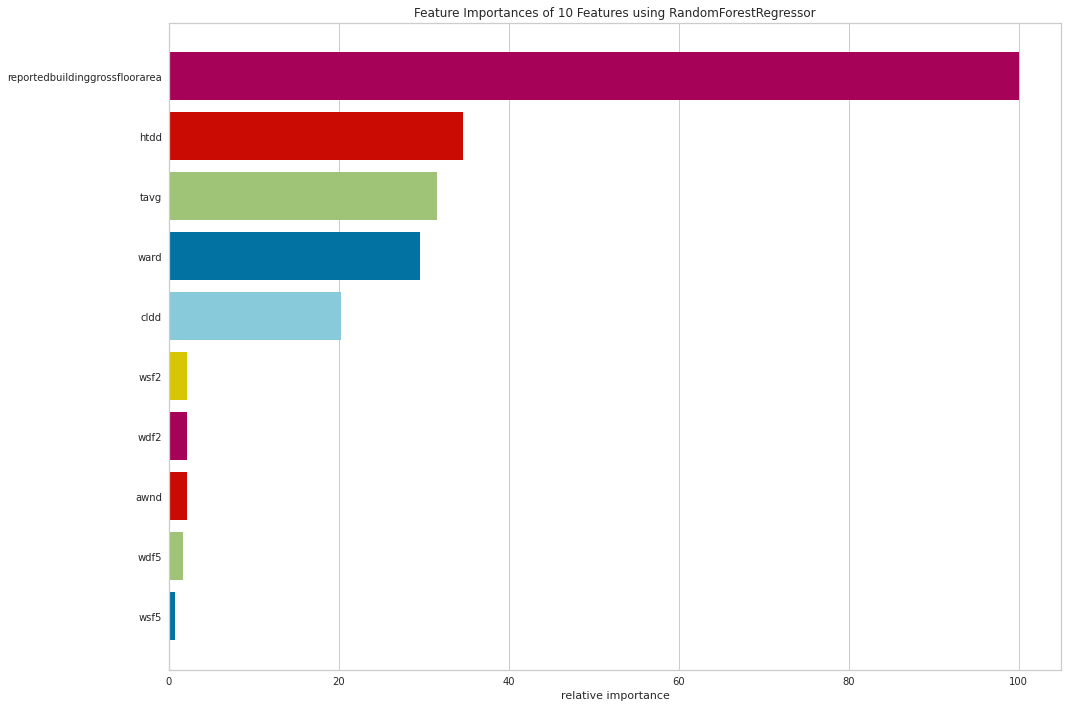

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


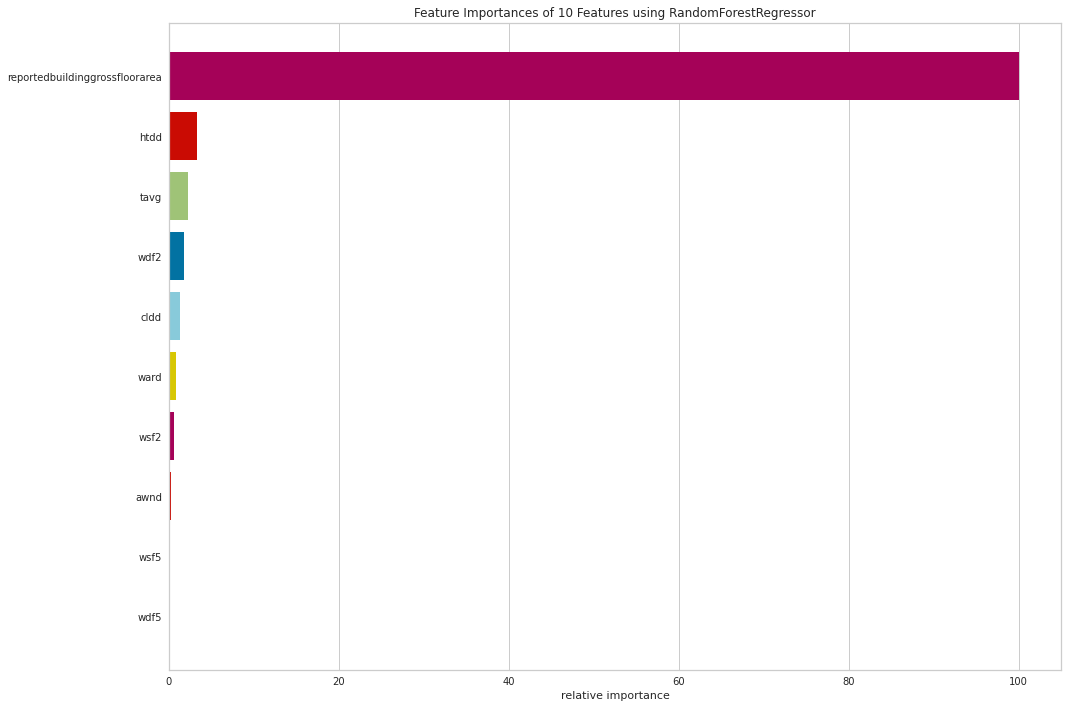

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


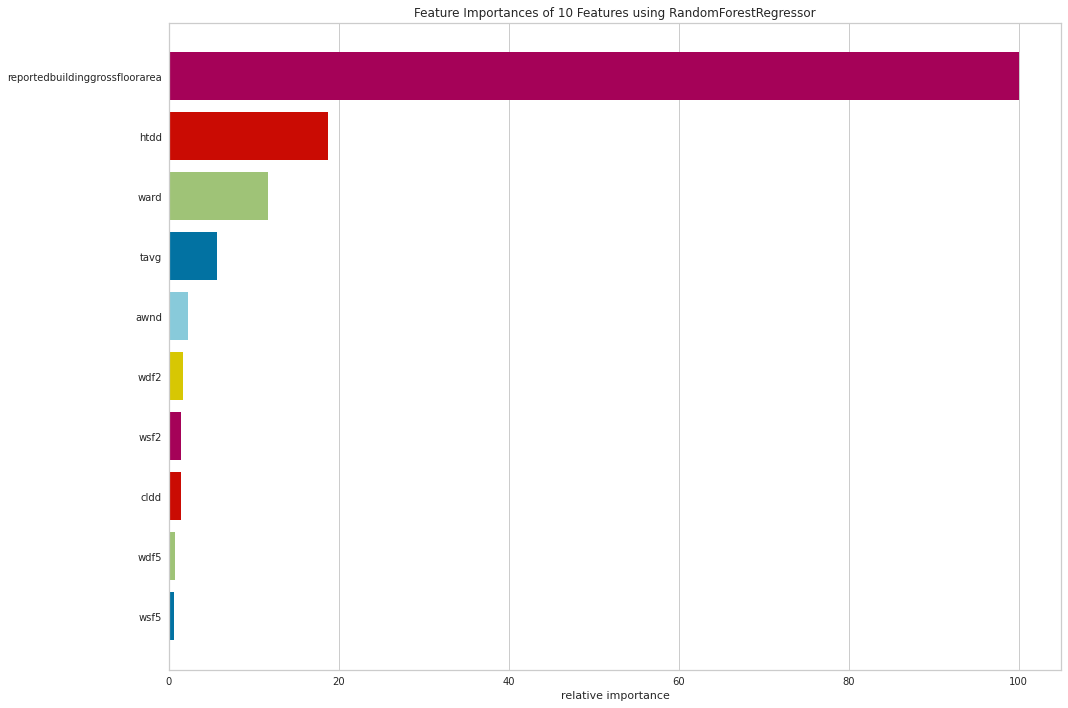

In [40]:
import yellowbrick as yb
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.features import RadViz
from yellowbrick.features import FeatureImportances

for natdfsubset_2019 in natdfsubsets_2019:
    model = RandomForestRegressor(n_estimators=10)
    viz = FeatureImportances(model, labels=ft, size=(1080, 720))
    X,y = make_sklearn_data(natdfsubset_2019, cols=ft)
    viz.fit(X, y)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
    viz.show()

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 784861123834654.9, tolerance: 2107470505836.7205
  positive)


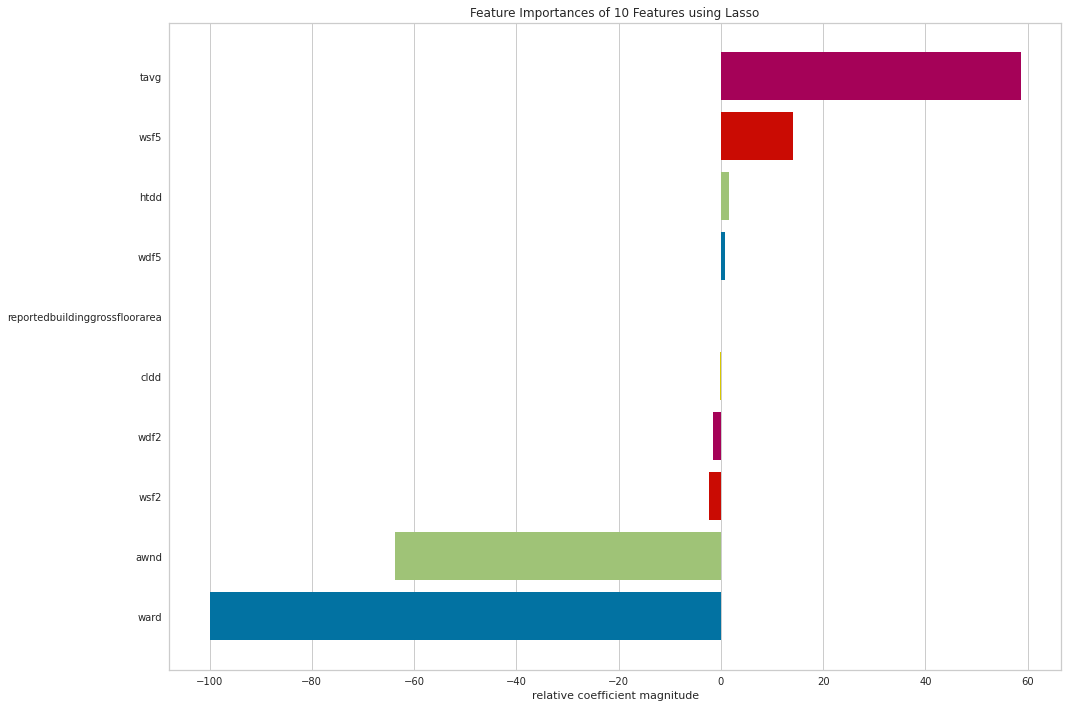

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37366415406242.93, tolerance: 20266480244.152653
  positive)


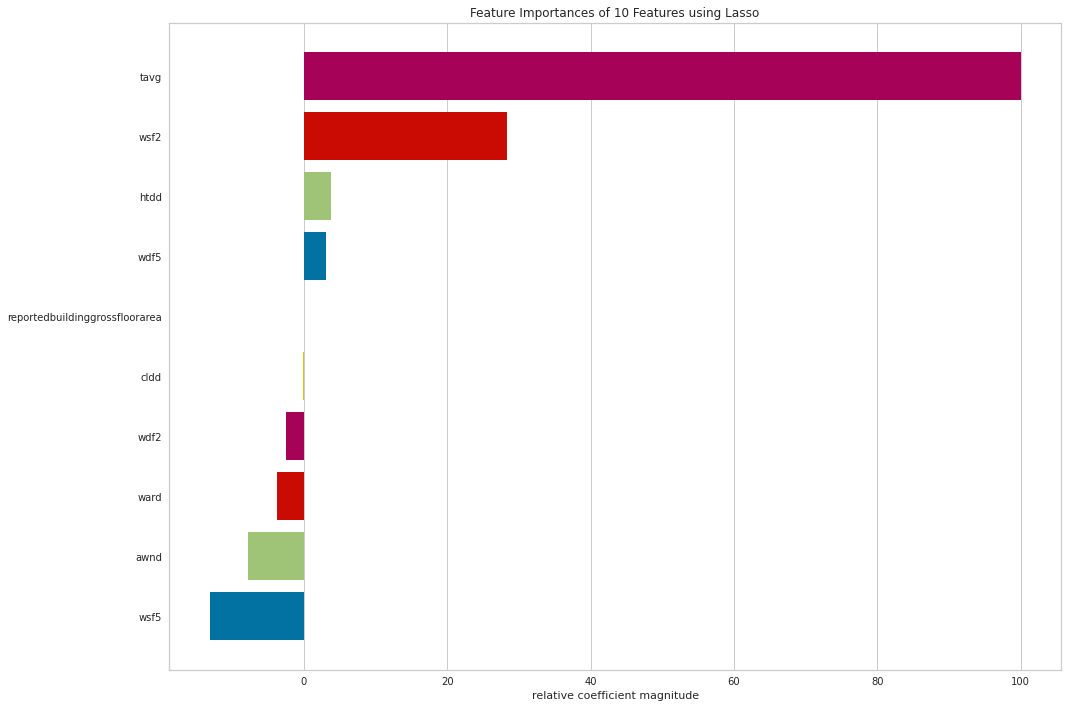

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2649935899986.3604, tolerance: 1492935056.4484115
  positive)


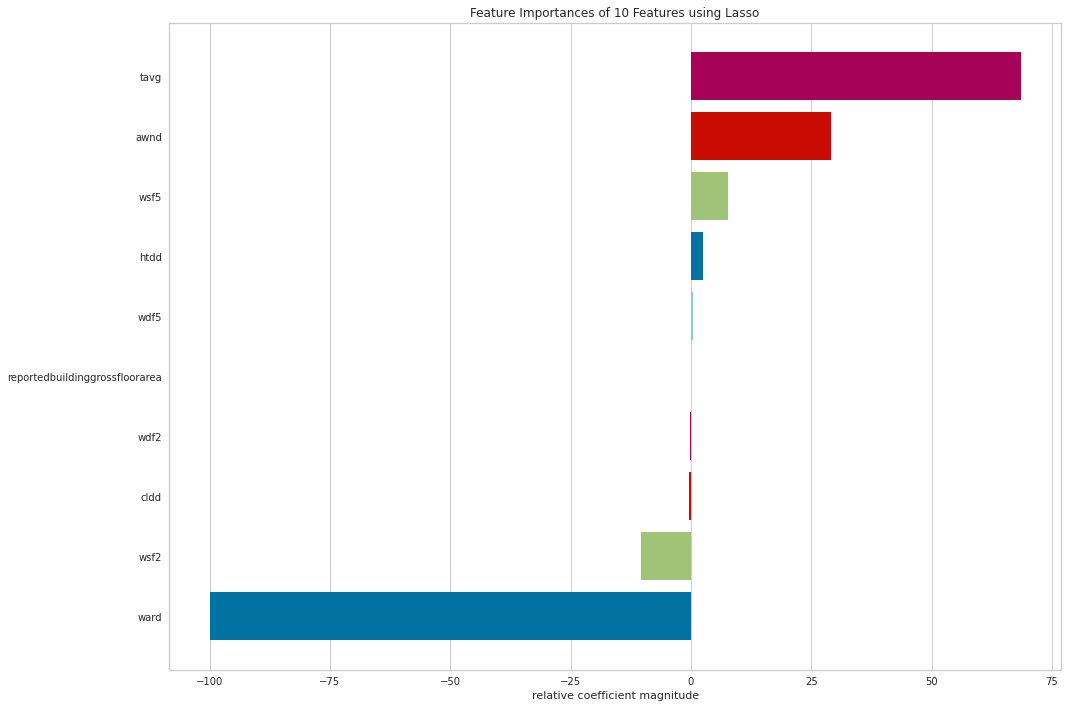

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 822948176527566.4, tolerance: 866132068483.4795
  positive)


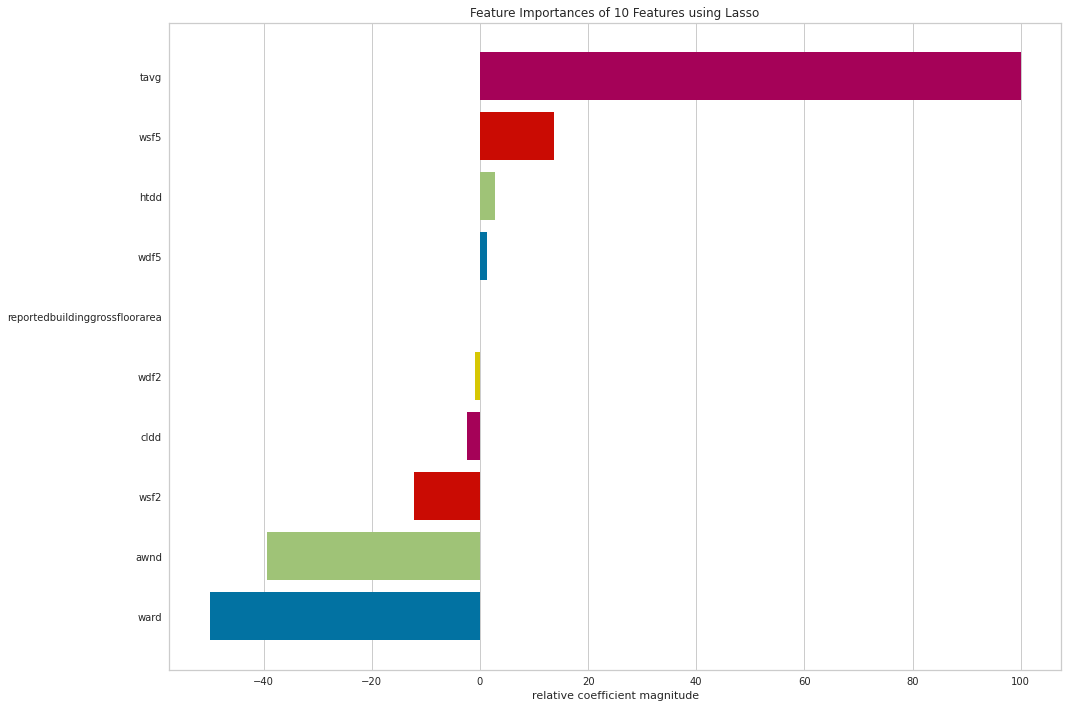

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 864879909900665.1, tolerance: 458107365008.3888
  positive)


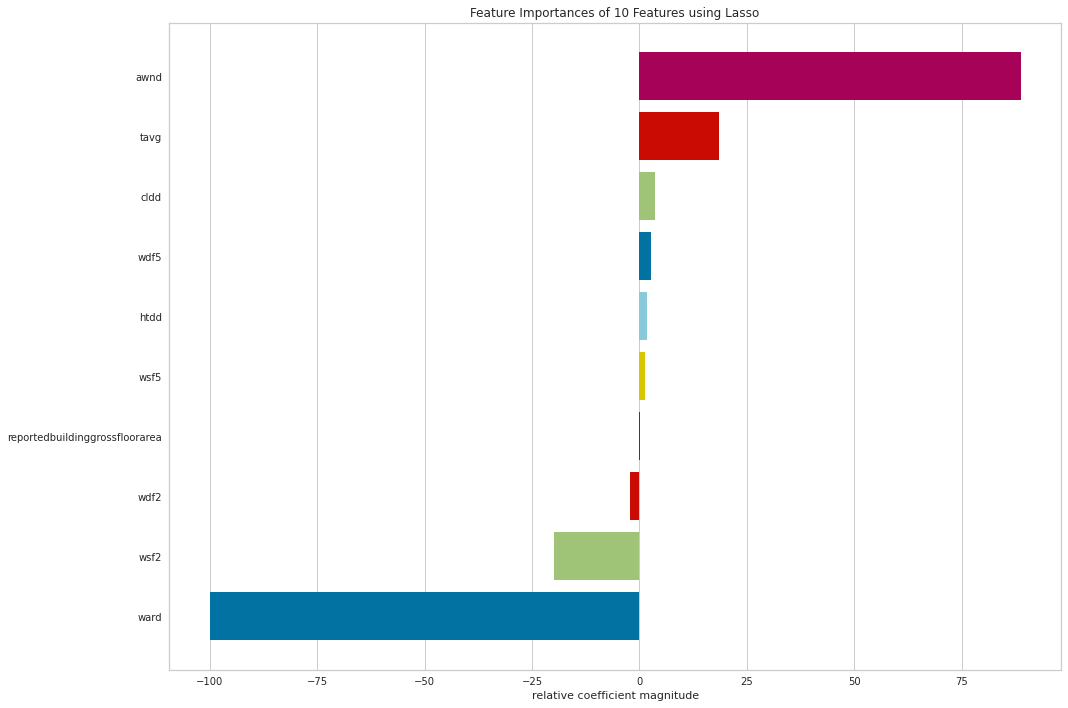

In [41]:

#Feature Importances
import yellowbrick as yb
from sklearn.linear_model import Lasso
from yellowbrick.features import RadViz
from yellowbrick.features import FeatureImportances

for eledfsubset_2018 in eledfsubsets_2018:
    model = Lasso()
    viz = FeatureImportances(model, labels=ft, size=(1080, 720))
    X,y = make_sklearn_data(eledfsubset_2018, cols=ft)
    viz.fit(X, y)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
    viz.show()

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 784861123834654.9, tolerance: 2107470505836.7205
  positive)


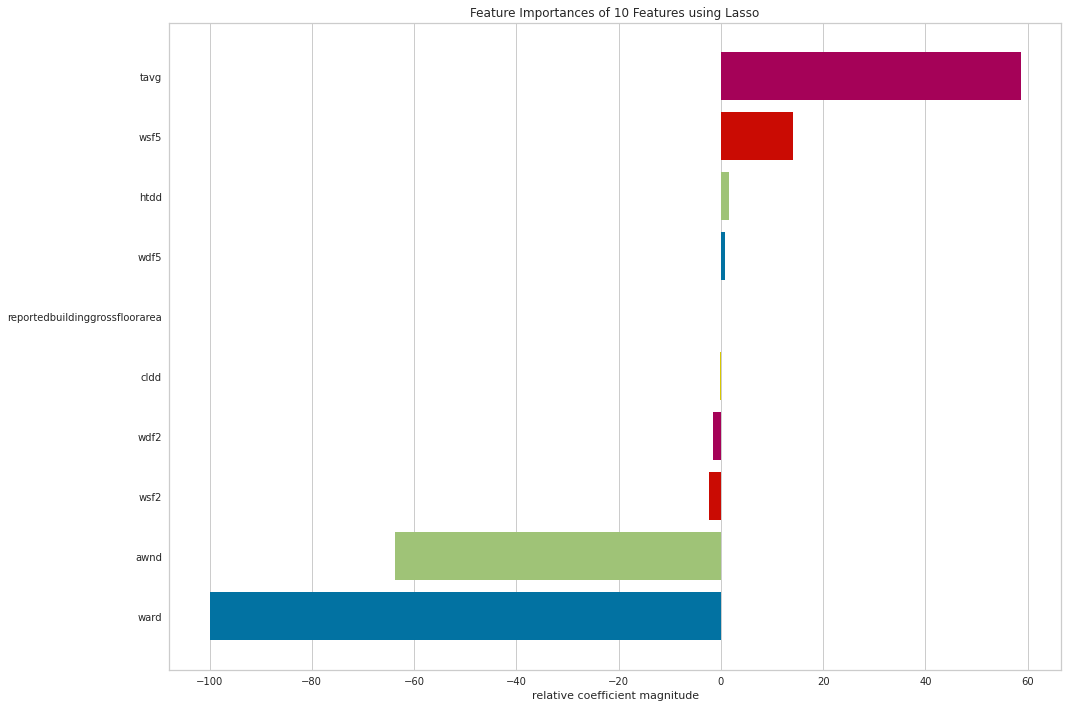

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37366415406242.93, tolerance: 20266480244.152653
  positive)


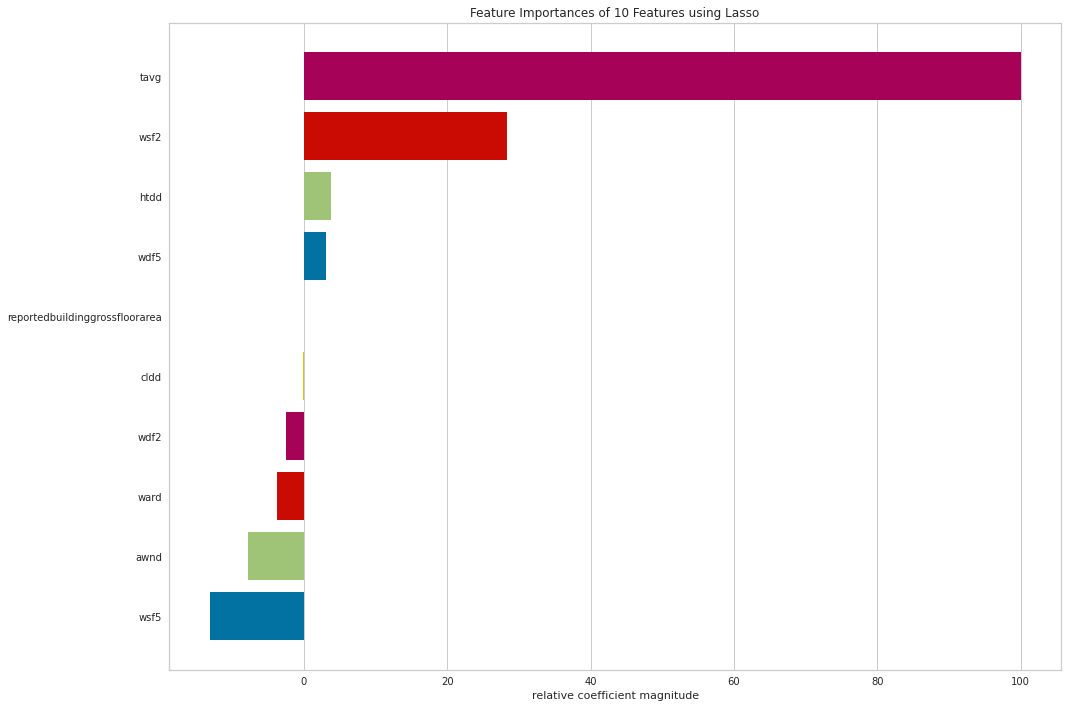

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2649935899986.3604, tolerance: 1492935056.4484115
  positive)


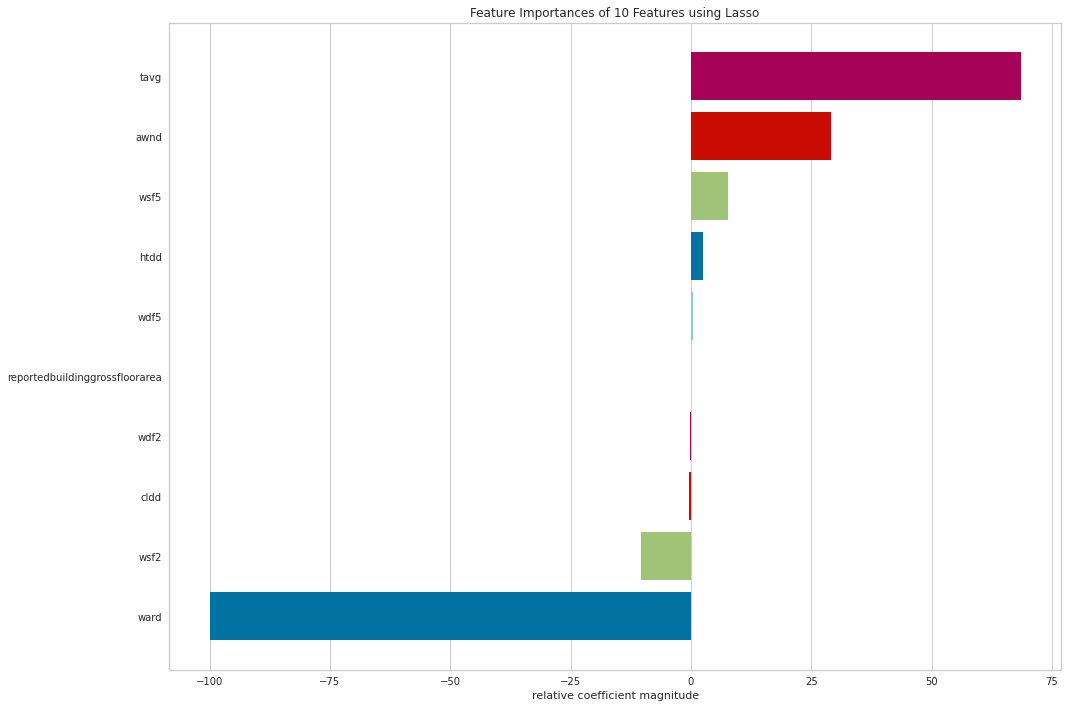

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 822948176527566.4, tolerance: 866132068483.4795
  positive)


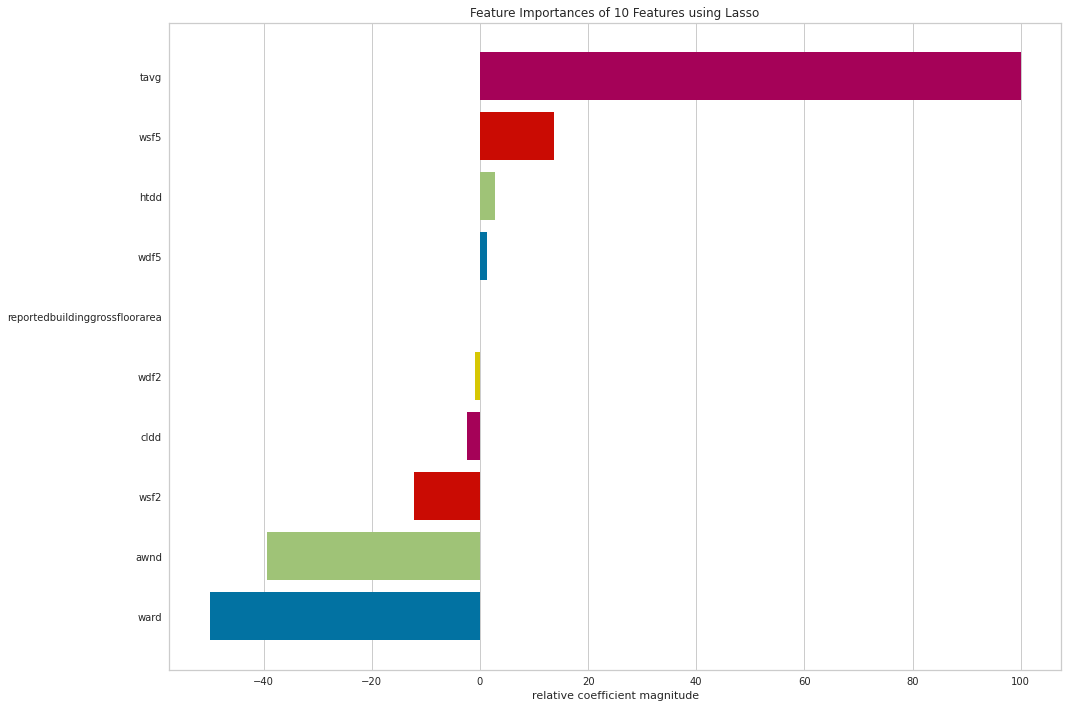

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 864879909900665.1, tolerance: 458107365008.3888
  positive)


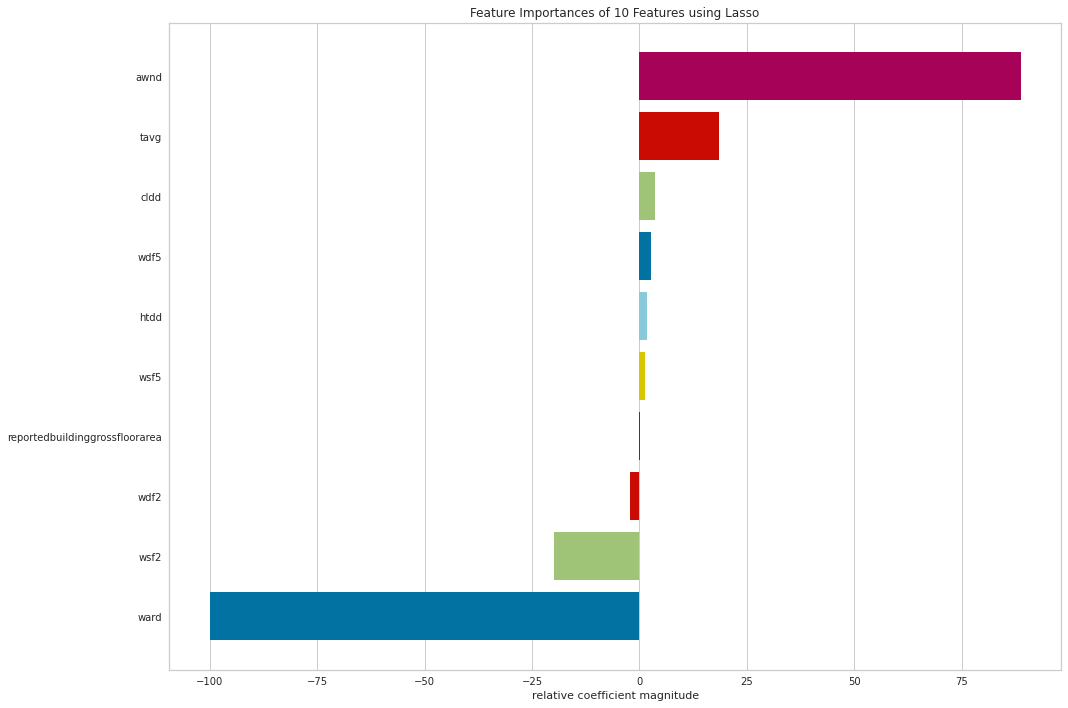

In [42]:
#Feature Importances
import yellowbrick as yb
from sklearn.linear_model import Lasso
from yellowbrick.features import RadViz
from yellowbrick.features import FeatureImportances

for eledfsubset_2019 in eledfsubsets_2019:
    model = Lasso()
    viz = FeatureImportances(model, labels=ft, size=(1080, 720))
    X,y = make_sklearn_data(eledfsubset_2019, cols=ft)
    viz.fit(X, y)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
    viz.show()

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5059079751149782.0, tolerance: 4858708687057.286
  positive)


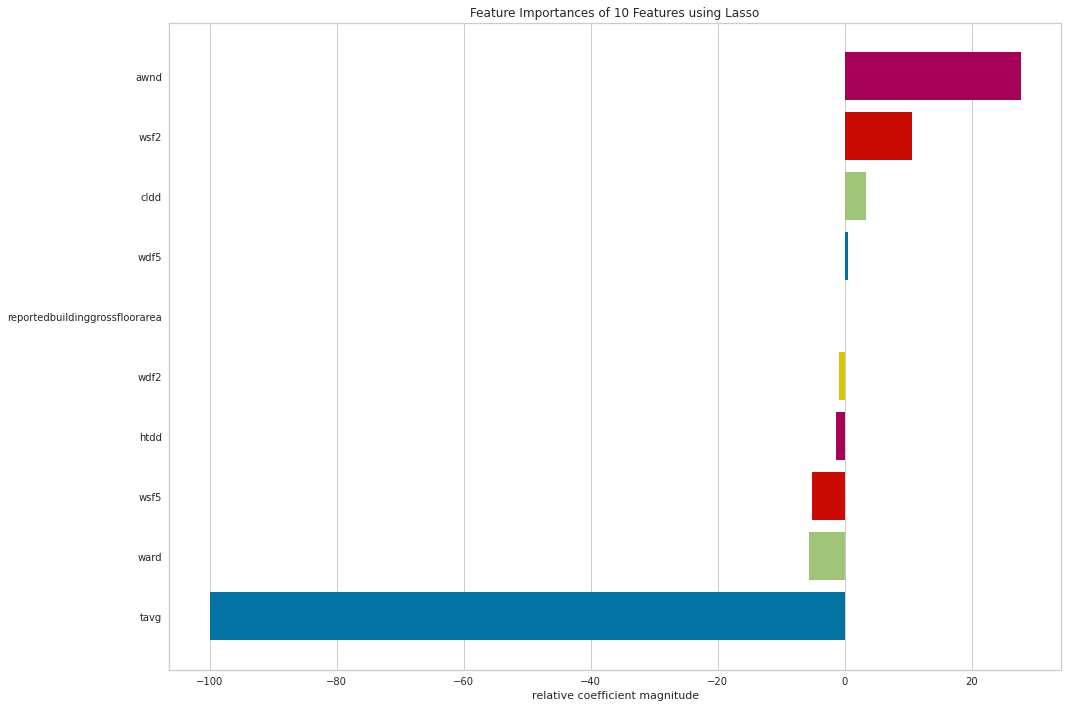

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30357212906221.008, tolerance: 25266548940.597412
  positive)


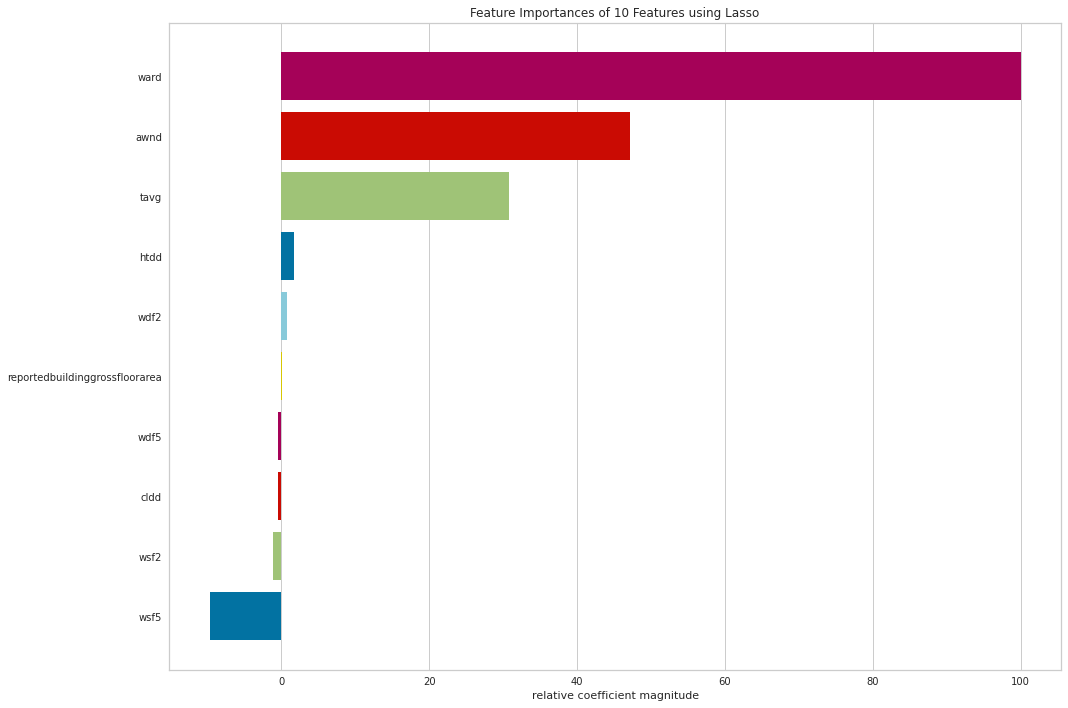

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3011645065588.1826, tolerance: 1449863953.9557548
  positive)


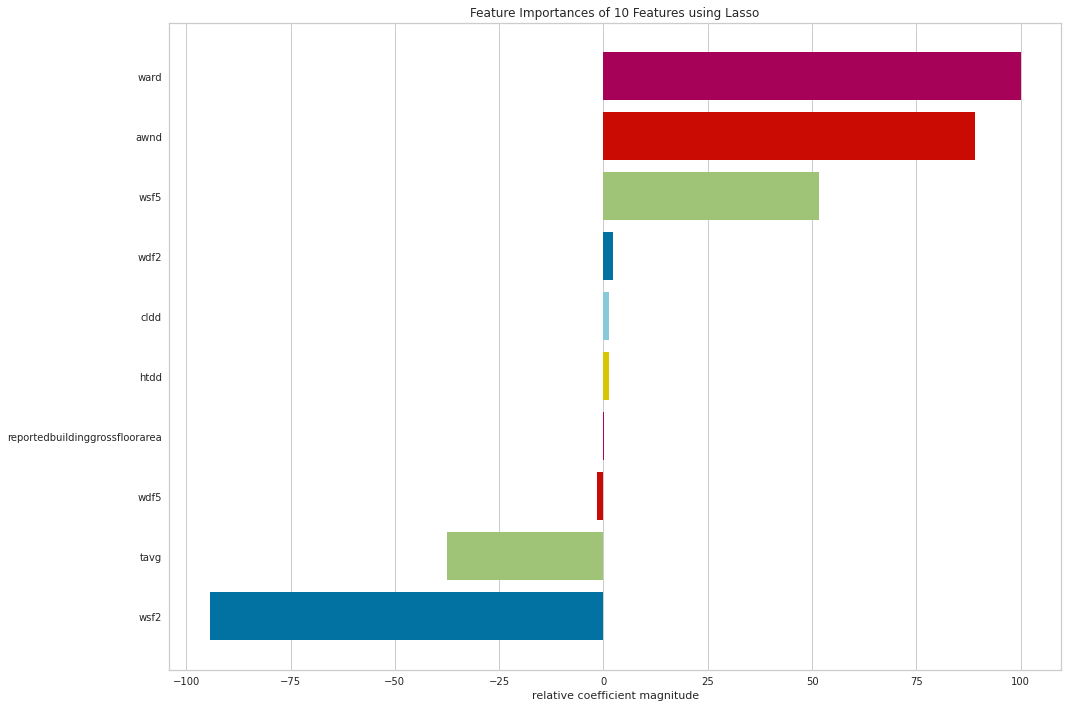

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3286447131997008e+16, tolerance: 4770453534080.3
  positive)


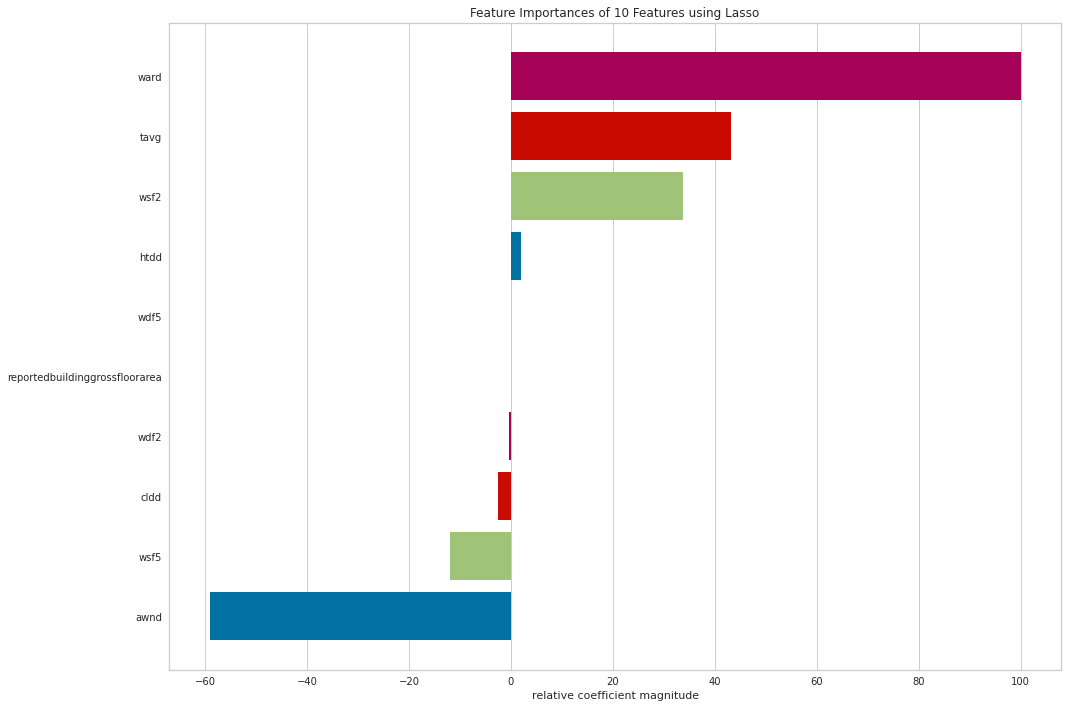

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1859105770428237.2, tolerance: 690134721430.4435
  positive)


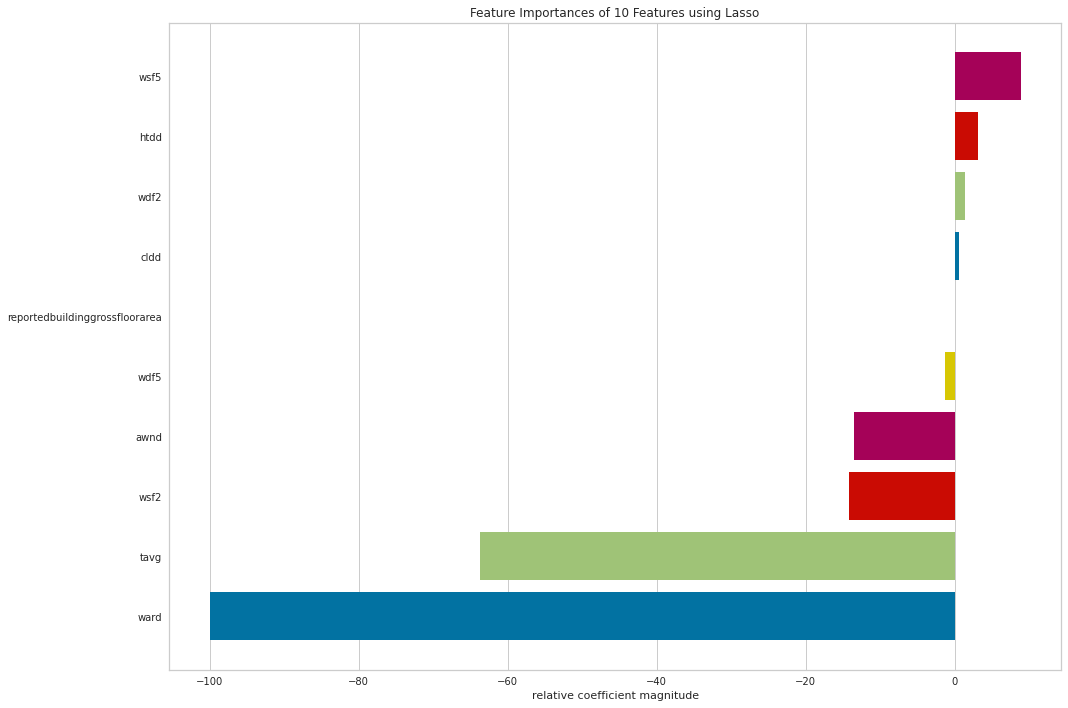

In [43]:
#Feature Importances
import yellowbrick as yb
from sklearn.linear_model import Lasso
from yellowbrick.features import RadViz
from yellowbrick.features import FeatureImportances

for natdfsubset_2018 in natdfsubsets_2018:
    model = Lasso()
    viz = FeatureImportances(model, labels=ft, size=(1080, 720))
    X,y = make_sklearn_data(natdfsubset_2018, cols=ft)
    viz.fit(X, y)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
    viz.show()

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3922108800993937.0, tolerance: 3559929754024.596
  positive)


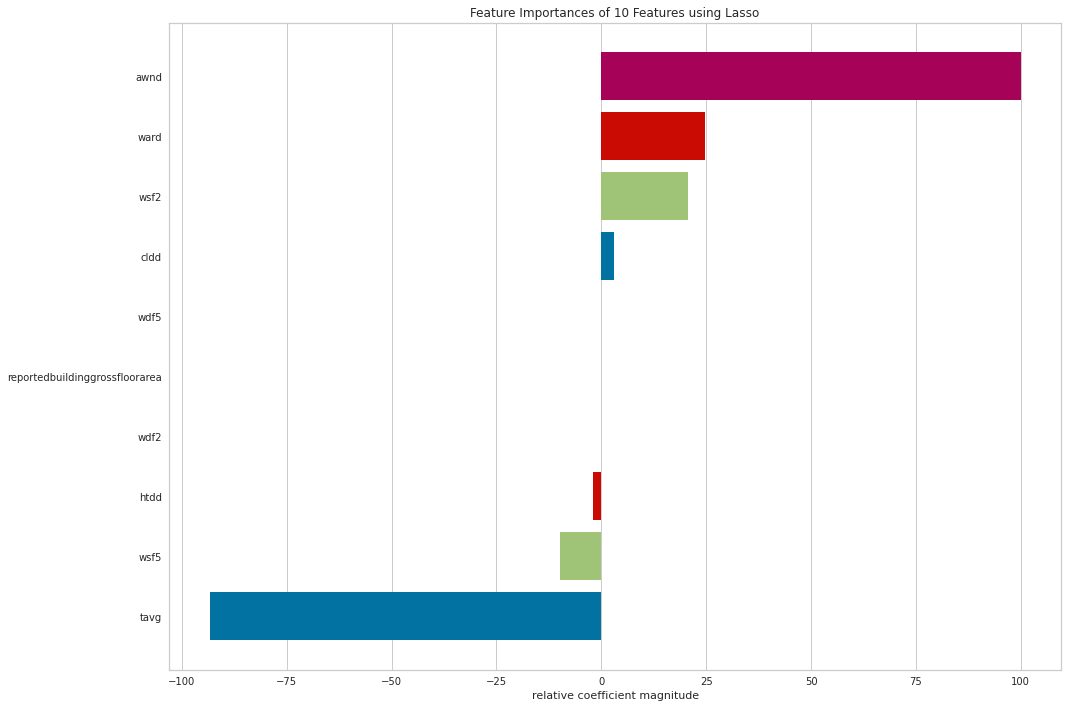

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85770607235976.22, tolerance: 27357958182.71428
  positive)


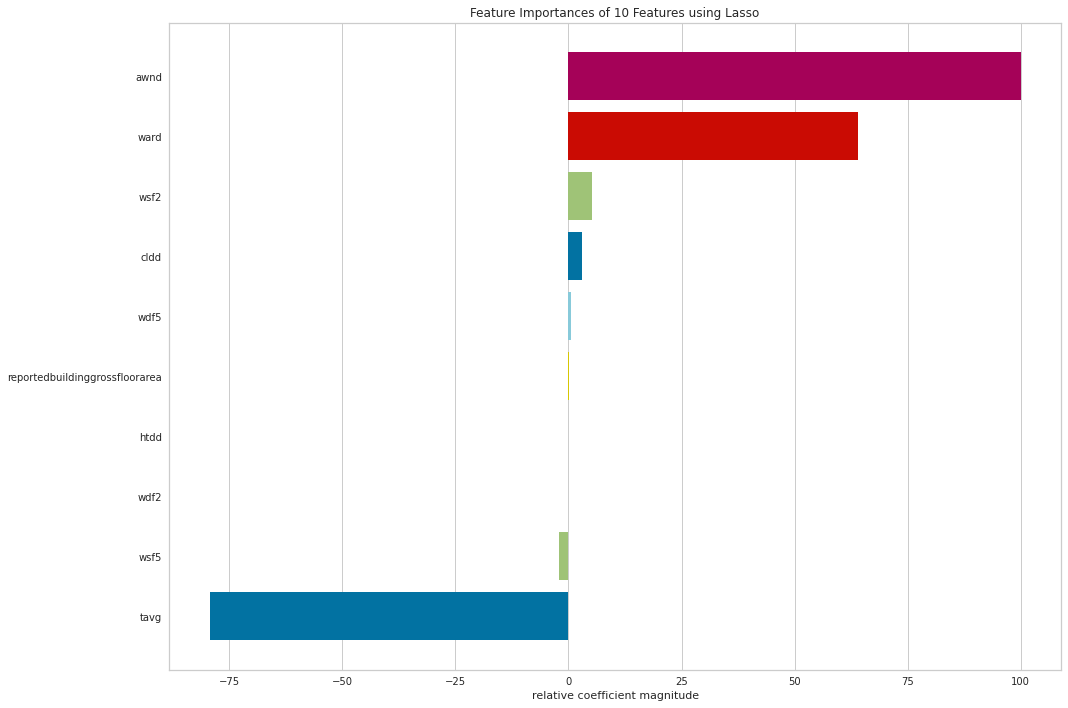

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2643406556988.138, tolerance: 1360149161.0251172
  positive)


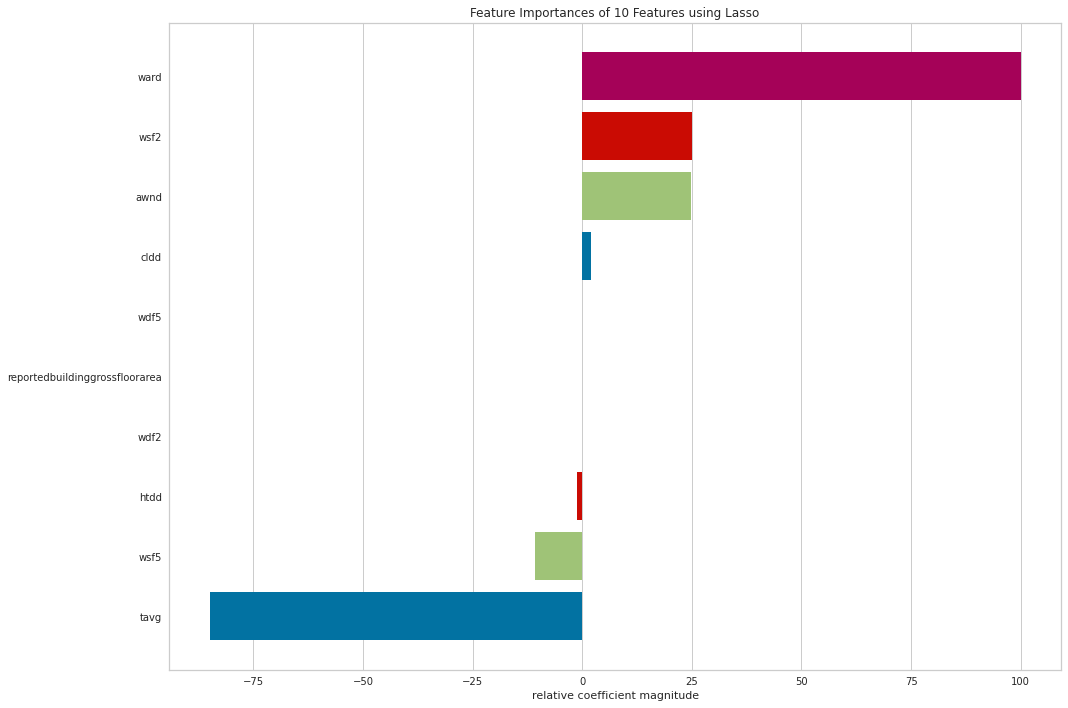

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7041486031862458.0, tolerance: 2495975278924.1416
  positive)


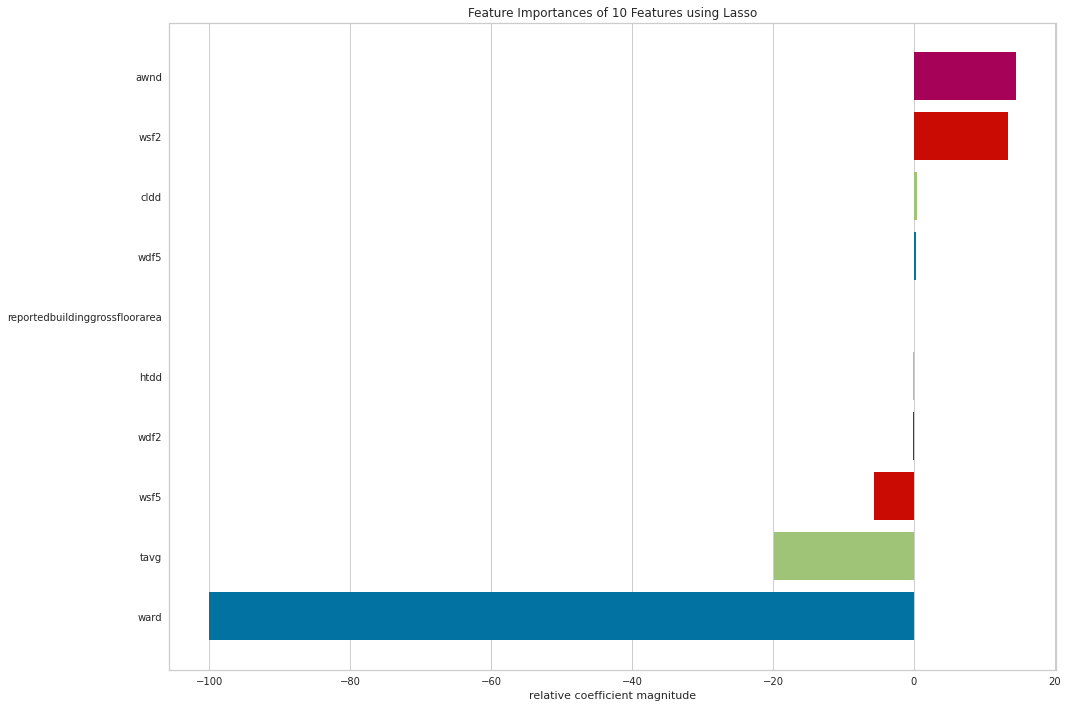

/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/lioness098/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1842924433568300.8, tolerance: 628692647542.5408
  positive)


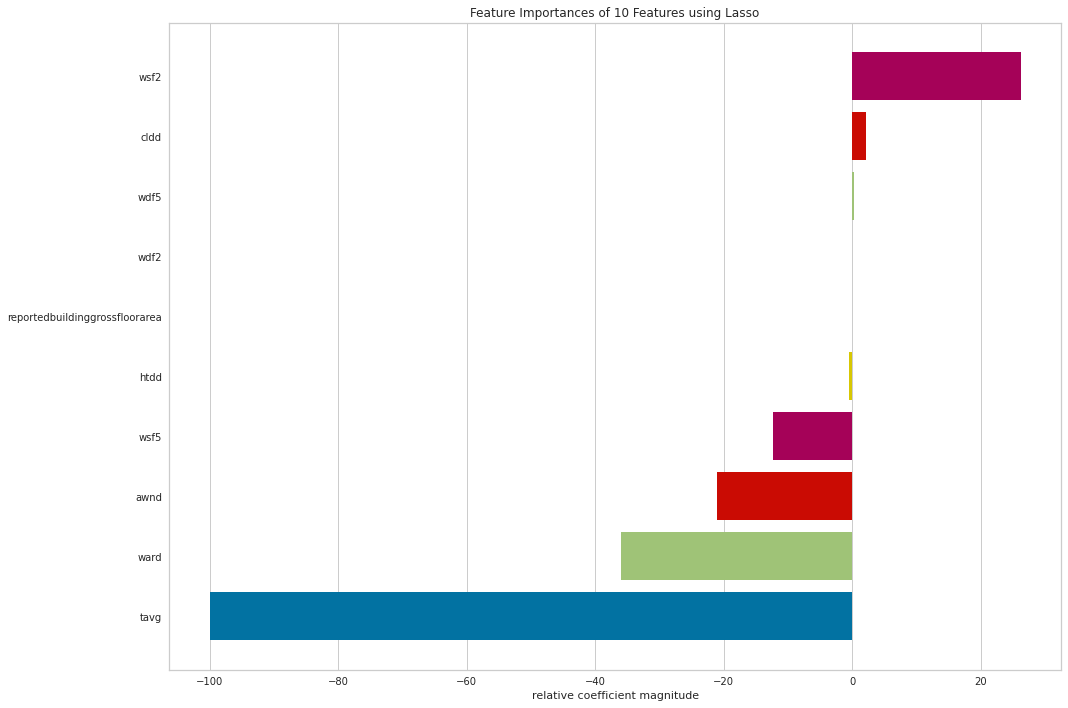

In [44]:
#Feature Importances
import yellowbrick as yb
from sklearn.linear_model import Lasso
from yellowbrick.features import RadViz
from yellowbrick.features import FeatureImportances

for natdfsubset_2019 in natdfsubsets_2019:
    model = Lasso()
    viz = FeatureImportances(model, labels=ft, size=(1080, 720))
    X,y = make_sklearn_data(natdfsubset_2019, cols=ft)
    viz.fit(X, y)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
    viz.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='datetime_cos', ylabel='datetime_sin'>

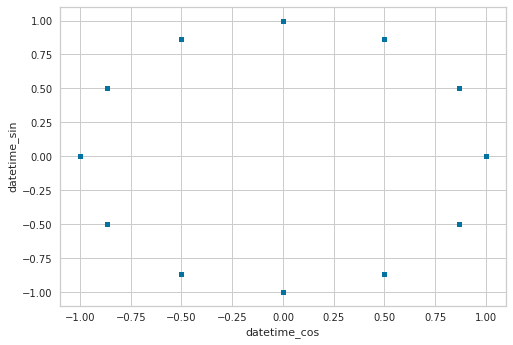

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin


class CyclicEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, date_extract="month"):
        if date_extract not in {"minute", "hour", "week", "month", "year"}:
            raise ValueError(f"specify correct date component to extract, not {date_extract}")
        self.date_extract = date_extract
    
    def get_date_component(self, x):
        if self.date_extract == "month":
            return x.dt.month
        elif self.date_extract == "year":
            return x.dt.year
        else:
            raise NotImplementedError(f"{self.date_extract} date component not implemented yet")
            
    def fit(self, X, y=None):
        self.cycle_max_ = self.get_date_component(X).max()
        return self

    def transform(self, X,  y=None):
        cols = []
        names = []
        x = self.get_date_component(X)
        xn = 2 * np.pi * x / self.cycle_max_
        cols.append(np.cos(xn))
        names.append(f"{X.name}_cos")
        cols.append(np.sin(xn))
        names.append(f"{X.name}_sin")
        return pd.DataFrame(np.asarray(cols).T, columns=names)

    
ce = CyclicEncoder().fit_transform(df.reset_index()["datetime"])
ce.plot(x="datetime_cos", y="datetime_sin", kind="scatter")

### Construct a Pipeline

In [46]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline

In [47]:
preprocessor_pipeline=Pipeline([
    ('column_selection', ColumnTransformer([
        ('time_components', FeatureUnion([
            ('month', CyclicEncoder(date_extract='month')), 
            ('year', CyclicEncoder(date_extract='year')),
                                    ]),'datetime'),
    ('ward', OneHotEncoder(handle_unknown='ignore'), ['ward']),
    ], remainder='passthrough')),
])
             

In [48]:
#Borrowing code from Dr.Bengfort's traffic notebook
from sklearn.base import clone
def make_energy_pipeline(model, append_transformers=None, fe=preprocessor_pipeline):
        # clone the pipeline to ensure it's not fitted
    pipe = clone(fe)
    
    #append any steps to the pipeline
    if append_transformers!= None:
        for step in append_transformers:
            pipe.steps.append(step)
    
    pipe.steps.append(["model", clone(model)])
    return pipe

In [49]:
from functools import partial
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

rmse = partial(mean_squared_error, squared=False)


def time_series_evaluate(model, X, y):
    """
    Performs time series cross validation on the model, returning the
    cross validated r2, mse, and mae of the regressor, along with the 
    final fitted model, fitted on all of the data.
    """
    cv = TimeSeriesSplit(12)
    scores = {}
    
    scores["r2"] = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(r2_score))
    scores["mse"] = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(mean_squared_error))
#     scores["rmse"] = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(rmse))
    scores["mae"] = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(mean_absolute_error))
    
    model.fit(X, y)
    return model, scores

In [50]:
from sklearn.ensemble import RandomForestRegressor
for eledfsubset_2018 in eledfsubsets_2018:
    X, y= make_sklearn_data(eledfsubset_2018)
    lm = make_energy_pipeline(RandomForestRegressor())
    print(time_series_evaluate(lm, X, y))

(Pipeline(steps=[('column_selection',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('time_components',
                                                  FeatureUnion(transformer_list=[('month',
                                                                                  CyclicEncoder()),
                                                                                 ('year',
                                                                                  CyclicEncoder(date_extract='year'))]),
                                                  'datetime'),
                                                 ('ward',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ward'])])),
                ['model', RandomForestRegressor()]]), {'r2': array([0.97254406, 0.92273221, 0.97945861, 0.95682702, 0.98976702,
       0.95661525, 0.979598 

In [51]:
from sklearn.ensemble import RandomForestRegressor
for eledfsubset_2019 in eledfsubsets_2019:
    X, y= make_sklearn_data(eledfsubset_2019)
    lm = make_energy_pipeline(RandomForestRegressor())
    print(time_series_evaluate(lm, X, y))

(Pipeline(steps=[('column_selection',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('time_components',
                                                  FeatureUnion(transformer_list=[('month',
                                                                                  CyclicEncoder()),
                                                                                 ('year',
                                                                                  CyclicEncoder(date_extract='year'))]),
                                                  'datetime'),
                                                 ('ward',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ward'])])),
                ['model', RandomForestRegressor()]]), {'r2': array([0.97302178, 0.92810609, 0.97877178, 0.94727035, 0.99013564,
       0.96254627, 0.9853820

In [52]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
for eledfsubset_2018 in eledfsubsets_2018:
    X, y= make_sklearn_data(eledfsubset_2018)
    lm = make_energy_pipeline(SGDRegressor(),[('quad', PolynomialFeatures(2))])
    print(time_series_evaluate(lm, X, y))

(Pipeline(steps=[('column_selection',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('time_components',
                                                  FeatureUnion(transformer_list=[('month',
                                                                                  CyclicEncoder()),
                                                                                 ('year',
                                                                                  CyclicEncoder(date_extract='year'))]),
                                                  'datetime'),
                                                 ('ward',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ward'])])),
                ('quad', PolynomialFeatures()), ['model', SGDRegressor()]]), {'r2': array([-4.82069230e+56, -1.57611702e+52, -6.22380982e+54, -6.70384954e+5

In [53]:
from sklearn.linear_model import SGDRegressor
for eledfsubset_2019 in eledfsubsets_2019:
    X, y= make_sklearn_data(eledfsubset_2019)
    lm = make_energy_pipeline(SGDRegressor(),[('quad', PolynomialFeatures(2))])
    print(time_series_evaluate(lm, X, y))

(Pipeline(steps=[('column_selection',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('time_components',
                                                  FeatureUnion(transformer_list=[('month',
                                                                                  CyclicEncoder()),
                                                                                 ('year',
                                                                                  CyclicEncoder(date_extract='year'))]),
                                                  'datetime'),
                                                 ('ward',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ward'])])),
                ('quad', PolynomialFeatures()), ['model', SGDRegressor()]]), {'r2': array([-9.37638454e+56, -7.80589117e+52, -2.84534439e+54, -4.57969079e+5

In [54]:
from sklearn.ensemble import RandomForestRegressor
for natdfsubset_2018 in natdfsubsets_2018:
    X, y= make_sklearn_data(natdfsubset_2018)
    lm = make_energy_pipeline(RandomForestRegressor())
    print(time_series_evaluate(lm, X, y))

(Pipeline(steps=[('column_selection',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('time_components',
                                                  FeatureUnion(transformer_list=[('month',
                                                                                  CyclicEncoder()),
                                                                                 ('year',
                                                                                  CyclicEncoder(date_extract='year'))]),
                                                  'datetime'),
                                                 ('ward',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ward'])])),
                ['model', RandomForestRegressor()]]), {'r2': array([0.98581246, 0.90649489, 0.39294631, 0.94289776, 0.43579431,
       0.74372618, 0.8415554

In [55]:
from sklearn.ensemble import RandomForestRegressor
for natdfsubset_2019 in natdfsubsets_2019:
    X, y= make_sklearn_data(natdfsubset_2019)
    lm = make_energy_pipeline(RandomForestRegressor())
    print(time_series_evaluate(lm, X, y))

(Pipeline(steps=[('column_selection',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('time_components',
                                                  FeatureUnion(transformer_list=[('month',
                                                                                  CyclicEncoder()),
                                                                                 ('year',
                                                                                  CyclicEncoder(date_extract='year'))]),
                                                  'datetime'),
                                                 ('ward',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ward'])])),
                ['model', RandomForestRegressor()]]), {'r2': array([ 0.99508468,  0.98084357,  0.03287833,  0.61329527,  0.15453452,
        0.82490322,  0.

In [56]:
from sklearn.linear_model import SGDRegressor
for natdfsubset_2018 in natdfsubsets_2018:
    X, y= make_sklearn_data(natdfsubset_2018)
    lm = make_energy_pipeline(SGDRegressor(),[('quad', PolynomialFeatures(2))])
    print(time_series_evaluate(lm, X, y))

(Pipeline(steps=[('column_selection',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('time_components',
                                                  FeatureUnion(transformer_list=[('month',
                                                                                  CyclicEncoder()),
                                                                                 ('year',
                                                                                  CyclicEncoder(date_extract='year'))]),
                                                  'datetime'),
                                                 ('ward',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ward'])])),
                ('quad', PolynomialFeatures()), ['model', SGDRegressor()]]), {'r2': array([-2.76138717e+56, -9.21864492e+53, -8.12538485e+54, -1.40686875e+5

In [57]:
from sklearn.linear_model import SGDRegressor
for natdfsubset_2019 in natdfsubsets_2019:
    X, y= make_sklearn_data(natdfsubset_2019)
    lm = make_energy_pipeline(SGDRegressor(),[('quad', PolynomialFeatures(2))])
    print(time_series_evaluate(lm, X, y))

(Pipeline(steps=[('column_selection',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('time_components',
                                                  FeatureUnion(transformer_list=[('month',
                                                                                  CyclicEncoder()),
                                                                                 ('year',
                                                                                  CyclicEncoder(date_extract='year'))]),
                                                  'datetime'),
                                                 ('ward',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ward'])])),
                ('quad', PolynomialFeatures()), ['model', SGDRegressor()]]), {'r2': array([-2.18049318e+54, -8.47831575e+55, -9.29367563e+55, -2.01758513e+5